# Project 1

### Introduction

The following project aims to analyze the lexicon content for tweets targeted towards Biden and Trump. Online presence 
often goes unchallenged allowing users to voice their personal opinions with limited restrictions. As such, users are 
likely to reflect their own character under the certainty that their true identity is hidden by their virtual identity.
Therefore, such sentiment analysis exposes underlying moral characteristics which influences each user's support for 
sentiment driven policies. After preprocessing the data, WordCloud analysis will be conducted on the data to 
graphically observe the most common words used in each dataframe's tweets. From this it can be checked whether the 
negative or positive traits of either candidates are well represented in tweets. The polarity and subjectivity of the tweets 
will also be assessed. The aim is to build a tweet classifier, from the choice of words within the tweet, to judge whether 
a given tweet is referring to Biden or Trump. 

The data is a DataFrame object holding the tweets and all other relevant information for both parties, Democratic and
Republican. The tweets have already been organized accordingly. These tweets have been pulled from Twitter and the dataset
has been obtained from Kaggle. The primary feature of the data is the tweet whereas other information is of little 
interest since it contains minimal information regarding the political stance of the user. The analysis will be focused 
on tweets only from the United States to limit the sample size and increase the classifier's accuracy. 

In [1]:
import re
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category = DeprecationWarning)
pd.options.mode.chained_assignment = None

pd.options.display.float_format = '{0:.4f}'.format

### Preprocessing the Tweets

In [2]:
dt = pd.read_csv("donaldtrump.csv", low_memory = False)
jb = pd.read_csv("joebiden.csv", low_memory = False)

To preprocess data the following will be done.
1. Remove Punctuation
2. Tokenize - break sentences into words
3. Remove stopwords
4. Lammetization - converting a word to its root word

However, step 4 could alter the dataset for the worse. Step 4 could distort the WordCloud representation of the tweets by 
making it more difficult to interpret. Thus, step 4 will be skipped. 

In [3]:
#Extracting and creating a copy of relative features
dt_copy = dt[["created_at","tweet", "user_id", "state_code", "country"]].copy()
dt_copy = dt_copy[dt_copy["country"] == "United States of America"]
dt_copy.set_index("created_at", inplace = True)
dt["tweet"] = str(dt["tweet"])


jb_copy = jb[["created_at","tweet", "user_id", "state_code", "country"]].copy()
jb_copy = jb_copy[jb_copy["country"] == "United States of America"]
jb_copy.set_index("created_at", inplace = True)
jb["tweet"] = str(jb["tweet"])

In [4]:
#Drops all 84 NA tweets
dt_copy = dt_copy[dt_copy["tweet"].notna()]

jb_copy = jb_copy[jb_copy["tweet"].notna()]

In [5]:
#Lowercase all tweets 
dt_copy["tweet"] = dt_copy["tweet"].apply(lambda tweet: tweet.lower())

jb_copy["tweet"] = jb_copy["tweet"].apply(lambda tweet: tweet.lower())

In [6]:
#Remove url links from the tweet 
dt_copy["tweet_no_url"] = dt_copy["tweet"].apply(lambda tweet: 
                                                 re.sub(r"\d+|http?\S+|[^A-Za-z0-9]+", " ",
                                                                      tweet))

jb_copy["tweet_no_url"] = jb_copy["tweet"].apply(lambda tweet: 
                                                 re.sub(r"\d+|http?\S+|[^A-Za-z0-9]+", " ",
                                                                      tweet))

In [7]:
#Removes any special characters, numbers, and punctuations   
dt_copy["cleaned_tweet"] = dt_copy["tweet_no_url"].str.replace("[^a-zA-Z#]"," ")

jb_copy["cleaned_tweet"] = jb_copy["tweet_no_url"].str.replace("[^a-zA-Z#]"," ")

In [8]:
#Removes unecessary white spaces in the cleaned tweets 
dt_copy["cleaned_tweet_complete"] = dt_copy["cleaned_tweet"].apply(lambda tweet: " ".
                                                                   join(tweet.split()))

jb_copy["cleaned_tweet_complete"] = jb_copy["cleaned_tweet"].apply(lambda tweet: " ".
                                                                   join(tweet.split()))

In [9]:
#Break each tweet into a list of the words composing the tweet
dt_copy["token_tweet"] = [tweet.split() for tweet in dt_copy["cleaned_tweet_complete"].values]

jb_copy["token_tweet"] = [tweet.split() for tweet in jb_copy["cleaned_tweet_complete"].values]

In [10]:
from nltk.corpus import stopwords

In [11]:
#Removes common stopwords, such as "and", "the", "that", to refine the analysis
stop_words = set(stopwords.words("english"))

words_dt = []

words_jb = []

for tweet in dt_copy["token_tweet"]:
    
    tweet_ = []
    
    for word in tweet:
        
        if word not in stop_words:
            
            tweet_.append(word)
        
    words_dt.append(tweet_)
    
for tweet in jb_copy["token_tweet"]:
    
    tweet_ = []
    
    for word in tweet:
       
        if word not in stop_words:
            
            tweet_.append(word)
        
    words_jb.append(tweet_)

In [12]:
#Rejoins the words to form the tweet without stopwords
tweet_comp_dt = []

tweet_comp_jb = []

for tweet in words_dt:
    
    tweet_ = " ".join(tweet)
    
    tweet_comp_dt.append(tweet_)
    
for tweet in words_jb:
    
    tweet_ = " ".join(tweet)
    
    tweet_comp_jb.append(tweet_)

In [13]:
#Stores the output into the respective dataframe
dt_copy["final_tweet"] = tweet_comp_dt

jb_copy["final_tweet"] = tweet_comp_jb

### Graphical and Sentiment Analysis

In [14]:
from wordcloud import WordCloud

In [15]:
#Placing the tweets in an object that WordCloud can process
tweet_dt = " ".join(tweet for tweet in dt_copy["final_tweet"])

tweet_jb = " ".join(tweet for tweet in jb_copy["final_tweet"])

In [16]:
#Instantiating the WordCloud object for the tweets
wc_dt = WordCloud(width = 750, height = 500, random_state = 1001, 
                  max_font_size = 100).generate(tweet_dt)

wc_jb = WordCloud(width = 750, height = 500, random_state = 1001, 
                  max_font_size = 100).generate(tweet_jb)

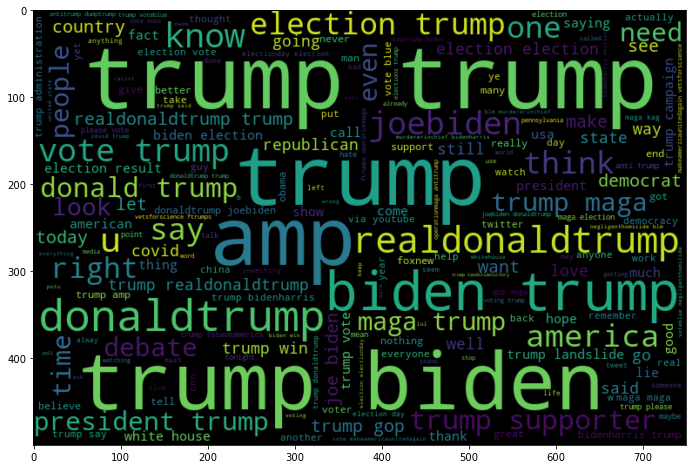

In [17]:
#Setting the size and plotting the WordCloud
plt.figure(figsize = (15,8))
plt.imshow(wc_dt, interpolation = "bilinear")

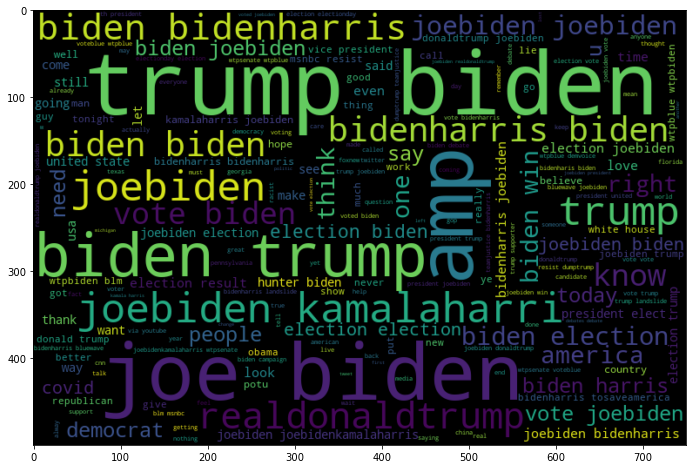

In [18]:
plt.figure(figsize = (15,8))
plt.imshow(wc_jb, interpolation = "bilinear")

From the above WordClouds, at first glance it is difficult to make out decisive differences between the images. 
Both parties' tweets mention the respective party's leader. However,it is interesting to note that Kamala Harris is 
mentioned frequently in Biden tweets evident by the size of the text in the immediately above WorldCloud whereas 
Mike Pence is never mentioned once, despite both being Vice Presidents of their respective parties. Alhough this offers 
some insight into the differing thought processes of the respective users, "Kamala Harris" nomination for the VP is a 
historical event in US politics and could be what drove the volume of tweets in the Biden WordCloud. 

The following will conduct a similar analysis but on the hashtags within the tweets.

In [19]:
#Creating a function to extract all hashtags for every tweet 
def hashtags(tweet_l):
    
    hashtags = []
    
    for tweet in tweet_l:
        
        hashtags.append(re.findall(r"#(\w+)", tweet))
        
    return hashtags

In [20]:
#Storing the output 
ht_dt = hashtags(dt_copy["tweet"].values)

ht_jb = hashtags(jb_copy["tweet"].values)

In [21]:
hashes_tweet_dt = []

hashes_tweet_jb = []


#Unpacks the list of lists into a single list
for hashes in ht_dt:
    
    for j_1 in hashes:
        
        hashes_tweet_dt.append(j_1)
        
for hashes in ht_jb:
    
    for j_2 in hashes:
        
        hashes_tweet_jb.append(j_2)

In [22]:
#Placing the tweets in an object that WordCloud can process
hashes_tweet_dt = " ".join(hashes_tweet_dt)

hashes_tweet_jb = " ".join(hashes_tweet_jb)

In [23]:
#Instantiating the WordCloud object for the hashtags
wc_ht_dt = WordCloud(width = 750, height = 500, random_state = 1001, max_font_size = 100).generate(
    hashes_tweet_dt)

wc_ht_jb = WordCloud(width = 750, height = 500, random_state = 1001, max_font_size = 100).generate(
    hashes_tweet_jb)

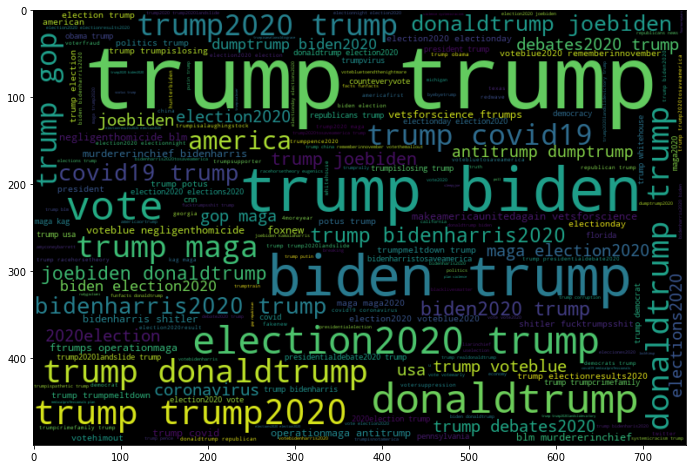

In [24]:
plt.figure(figsize = (15,8))
plt.imshow(wc_ht_dt, interpolation = "bilinear")

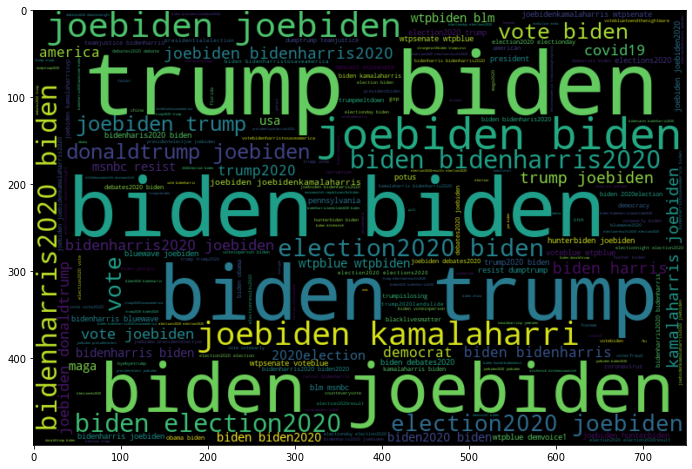

In [25]:
plt.figure(figsize = (15,8))
plt.imshow(wc_ht_jb, interpolation = "bilinear")

From the two above WordClouds, for the hashtags alone, similar inferences can be drawn as the previous two WordClouds for 
the cleaned tweets without hashtags. For instance, references to Kamala Harris now seems to constitute a larger portion of 
the underlying data in the latter WordCloud. Unlike the tweets without hashtags, the proportion of words referencing 
to Trump and Biden have considerably increased. Moreover, words related to the election such as "vote" and "election2020"
are now larger and more prominent. This is likely to be the case since hashtags, by nature, are short and direct. Thus,
they are more likely to refer to either the candidate of interest or the underlying event, which is the election.

In [26]:
from nltk import FreqDist

In [27]:
tweet_dt = []

tweet_jb = []


#Splitting each tweet into individual words and concatentating all words 
#from all tweets in a single list
for tweet in dt_copy["final_tweet"].str.split():
    
    for word in tweet:
        
        tweet_dt.append(word)

for tweet in jb_copy["final_tweet"].str.split():
    
    for word in tweet:
        
        tweet_jb.append(word)


In [28]:
#Obtaining the frequency distribution for the 10 most common words
word_dist_dt = FreqDist(tweet_dt).most_common(10)

word_dist_jb = FreqDist(tweet_jb).most_common(10)

#Unpacking the tuples into separate lists for plotting purposes
def untuple(tuples):
    
    unpack_word = []
    
    unpack_freq = []
    
    for tuple_ in list(tuples):
        
        word, freq = tuple_
        
        unpack_word.append(word)
        
        unpack_freq.append(freq)
        
    return unpack_word, unpack_freq

#Storing the output in callable objects
word_dist_plot_word_dt, word_dist_plot_freq_dt = untuple(word_dist_dt)

word_dist_plot_word_jb, word_dist_plot_freq_jb = untuple(word_dist_jb)

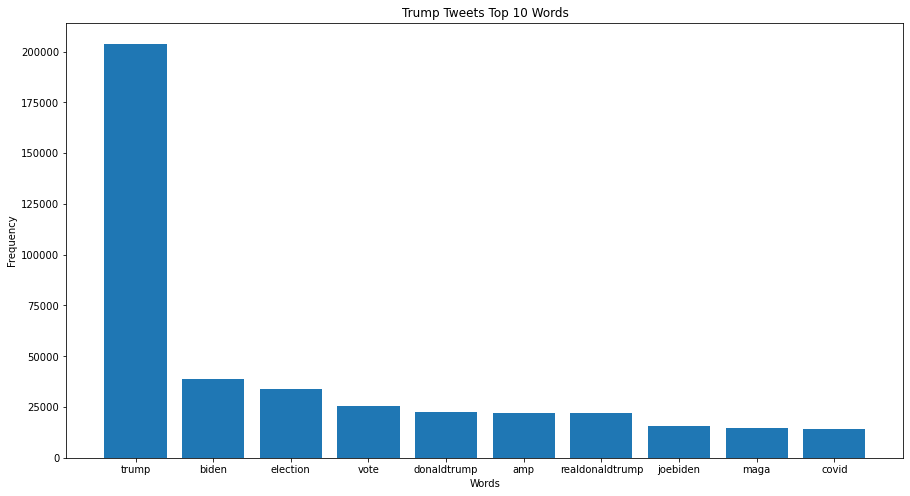

In [29]:
#Setting the size and plotting the bar chart 
fig = plt.figure(figsize = (15,8))

plt.bar(x = word_dist_plot_word_dt, height = word_dist_plot_freq_dt)

plt.title("Trump Tweets Top 10 Words")

plt.xlabel("Words")

plt.ylabel("Frequency")

plt.show()

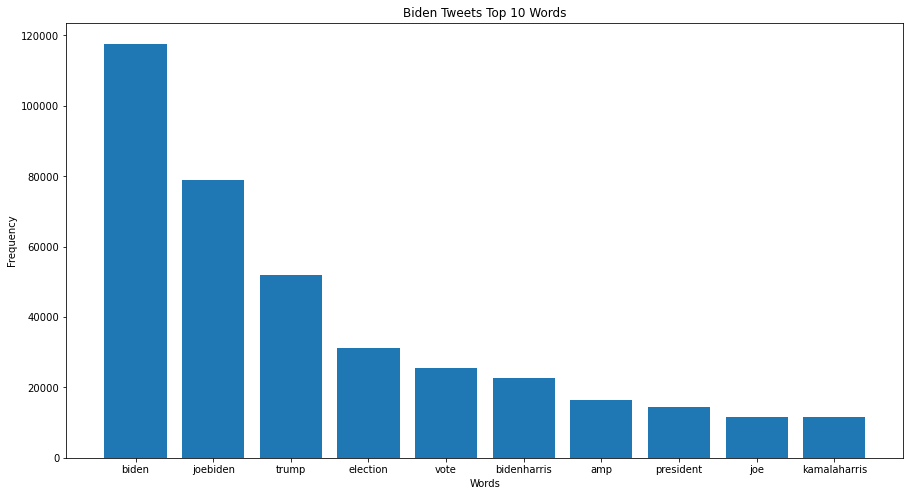

In [30]:
fig = plt.figure(figsize = (15,8))

plt.bar(x = word_dist_plot_word_jb, height = word_dist_plot_freq_jb)

plt.title("Biden Tweets Top 10 Words")

plt.xlabel("Words")

plt.ylabel("Frequency")

plt.show()

The above two bar charts plot the frequencies of the top 10 common words in tweets directed towards Trump and in tweets
directed towards Biden. It is no surprise that the most common words, in the respective tweets, are "trump" and "biden". 
However, the number of times these words are referenced is substantially greater for Trump tweets. Although this can be 
attributed to a greater sample size for Trump tweets, "dt_copy" has only 25 000  more observations than "jb_copy" and cannot
explain the extremely large margin between "trump" and "biden" count. As such, the relatively greater volume of "trump" is 
likely to be explained by a greater interest in Trump than Biden. Also note the use of "maga" in only tweets targeted 
towards Trump. "maga", due to its assosciation with Trump and the Republican party is likely to be referenced more in 
tweets targeted towards Trump.

In [31]:
#Finding the 500 most common words for tweets in both dataframes and storing 
#them in new corresponding dataframes
word_dist_dt = FreqDist(tweet_dt).most_common(500)

word_dist_jb = FreqDist(tweet_jb).most_common(500)

word_dist_plot_word_dt, word_dist_plot_freq_dt = untuple(word_dist_dt)

word_dist_plot_word_jb, word_dist_plot_freq_jb = untuple(word_dist_jb)

word_dist_dt = pd.DataFrame(data = {"Frequency":word_dist_plot_freq_dt}, 
                            index = word_dist_plot_word_dt)

word_dist_jb = pd.DataFrame(data = {"Frequency":word_dist_plot_freq_jb}, 
                            index = word_dist_plot_word_jb)

In [32]:
#Finding common words in tweets from newly created dataframes 
l = []

for word in word_dist_jb.index:
    
    if word in word_dist_dt.index:
        
        l.append(word)

In [33]:
#Resetting the indices of newly created dataframes so only common words are included 
word_dist_dt, word_dist_jb = word_dist_dt.reindex(l), word_dist_jb.reindex(l)

In [34]:
#Merging the newly created dataframes into a single dataframe 
word_dist_df = pd.concat([word_dist_dt, word_dist_jb], axis = 1)

In [35]:
#Renaming columns
word_dist_df["Trump Tweets"] = word_dist_df.iloc[:, 0]

word_dist_df["Biden Tweets"] = word_dist_df.iloc[:, 1]

word_dist_df = word_dist_df.iloc[:, [2,3]]

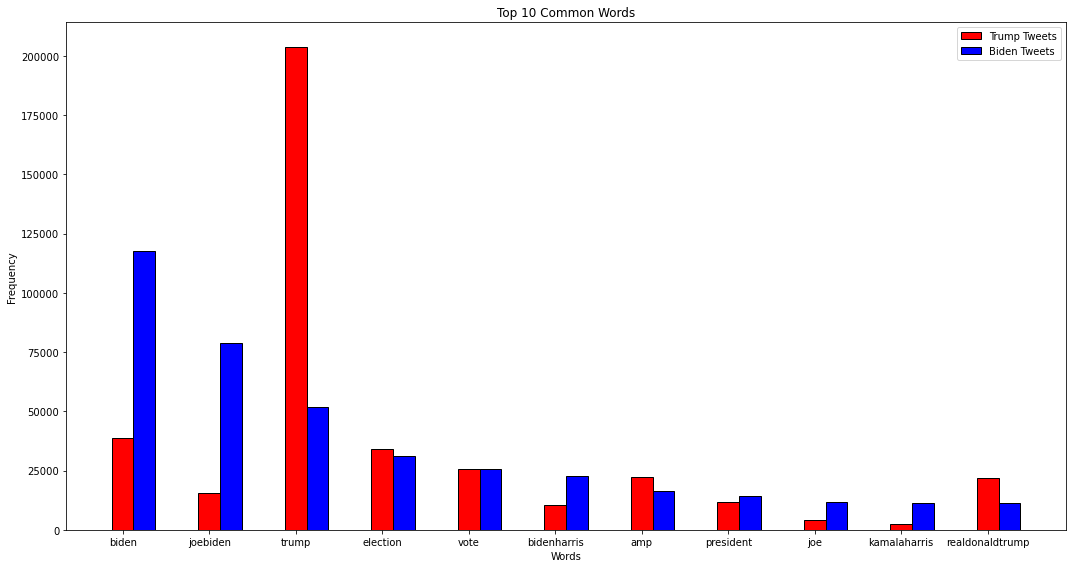

In [36]:
#Plotting the frequency of common words in tweets from both dataframes 
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(11), height = word_dist_df.iloc[:11, 0], width = width, 
        color = "red", ec = "black", 
        label = "Trump Tweets")

plt.bar(x = np.arange(11) + width, height = word_dist_df.iloc[:11, 1], 
        width = width, color = "blue", 
        ec = "black", label = "Biden Tweets")

plt.xticks(np.arange(11), list(word_dist_df.index[:11]))

plt.legend(loc = "best")

plt.title("Top 10 Common Words")

plt.xlabel("Words")

plt.ylabel("Frequency")

fig.tight_layout()

plt.show()


The above graph plots the frequency of common words in tweets for Trump and Biden. From the graph, it can be clearly 
inferred, Trump tweets more frequently include "trump" relative to Biden tweets. The same holds for "biden" and "joebiden".
This is no coincidence; it is only logical for tweets targeted towards a certain individual to more frequently refer to
that individual of interest. As such, Biden tweets refer to a derivative of "joebiden" more frequently than Trump tweets 
whereas the opposite holds for a derivative of "donaldtrump". What is interesting to note, once again, is Mike Pence is 
completely forgotten in the tweets; references to Kamala Harris, however, are relatively abundant even though both
individuals occupy the same role for their respective parties. 



In [37]:
from textblob import TextBlob

In [38]:
#Conducting polarity and subjectivity analysis for tweets from both dataframes 
polarity_dt, subjectivity_dt = [], []

polarity_jb, subjectivity_jb = [], []

#Conducting sentiment analysis and unpacking output into respective lists 
for tweet in dt_copy["final_tweet"]:
    
    polarity, subjectivity = TextBlob(tweet).sentiment 
    
    polarity_dt.append(polarity)
    
    subjectivity_dt.append(subjectivity)
    
for tweet in jb_copy["final_tweet"]:
    
    polarity, subjectivity = TextBlob(tweet).sentiment 
    
    polarity_jb.append(polarity)
    
    subjectivity_jb.append(subjectivity)

In [39]:
#Storing the sentiment analysis into the respective dataframes 
dt_copy["Polarity"], dt_copy["Subjectivity"] = polarity_dt, subjectivity_dt 

jb_copy["Polarity"], jb_copy["Subjectivity"] = polarity_jb, subjectivity_jb

In [40]:
pol_dt, sub_dt, = dt_copy["Polarity"].describe(),  dt_copy["Subjectivity"].describe()

pol_jb, sub_jb, = jb_copy["Polarity"].describe(),  jb_copy["Subjectivity"].describe()

sum_stats = pd.DataFrame(data = {"Trump Polarity": pol_dt, "Trump Subjectivity": 
                                 sub_dt,"Biden Polarity": pol_jb, "Biden Subjectivity": sub_jb}, 
                         index = pol_dt.index)

In [41]:
sum_stats

Trump Polarity  Trump Subjectivity  Biden Polarity  Biden Subjectivity
count     178897.0000         178897.0000     153595.0000         153595.0000
mean           0.0362              0.3179          0.0772              0.2987
std            0.2723              0.3174          0.2696              0.3181
min           -1.0000              0.0000         -1.0000              0.0000
25%            0.0000              0.0000          0.0000              0.0000
50%            0.0000              0.2846          0.0000              0.2143
75%            0.1364              0.5500          0.1833              0.5400
max            1.0000              1.0000          1.0000              1.0000


Since it is difficult to show the summary statistics for the words in the tweets, it is made slightly easier by conducting
sentiment analysis and assigning to each tweet a tuple consisting of the tweet's polarity and the tweet's subjectivity. This
is done above and the summary statistics for the polarity and subjectivity of the tweets is shown in the above table. The 
first two columns refer to the tweets directed to Trump and the final two columns refer to the tweets directed to Biden. 



In [42]:
import seaborn as sns

sns.set_theme("paper")

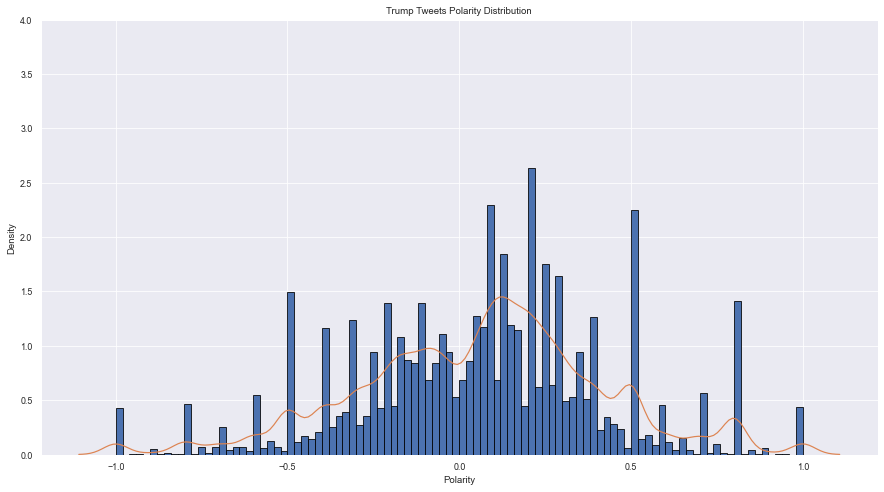

In [43]:
#Plotting the density distribution for Trump's tweets' polarity 
fig = plt.figure(figsize = (15,8))

plt.hist(dt_copy["Polarity"][dt_copy["Polarity"]!= 0], bins = 100, density = True, histtype = "bar", 
         ec = "black")

sns.kdeplot(dt_copy["Polarity"][dt_copy["Polarity"]!= 0])

plt.title("Trump Tweets Polarity Distribution")

plt.yticks(np.arange(0, 4.5, 0.5))

plt.show()

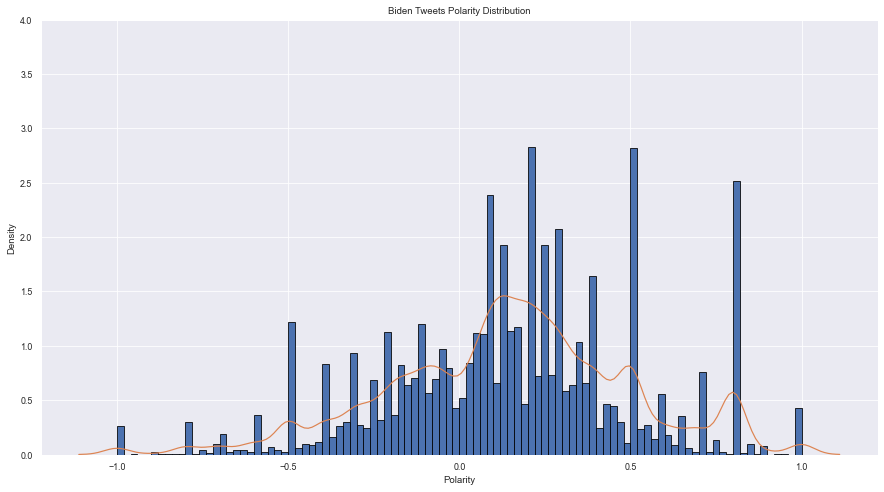

In [44]:
#Plotting the density distribution for Biden's tweets' polarity 
fig = plt.figure(figsize = (15,8))

plt.hist(jb_copy["Polarity"][jb_copy["Polarity"]!= 0], bins = 100, density = True, histtype = "bar", 
         ec = "black")

sns.kdeplot(jb_copy["Polarity"][jb_copy["Polarity"]!= 0])

plt.title("Biden Tweets Polarity Distribution")

plt.yticks(np.arange(0, 4.5, 0.5))

plt.show()

In [45]:
from scipy.stats import ttest_ind

In [46]:
t_stat, p_value = ttest_ind(dt_copy["Polarity"][dt_copy["Polarity"] != 0], jb_copy["Polarity"]
                            [jb_copy["Polarity"] != 0], equal_var = False)

In [47]:
p_value

0.0


The two above graphs attempt to plot an accurate kernel distribution of the underlying polarity histograms. Observing the 
x-axis on both graphs, it seems both distributions are centered close to a non-zero positive number. However, a t-test to 
test the null hypothesis that the mean of both distributions are same is rejected at the 5% significance level, as above. 
A single sided t-test will confirm, statistically, that the mean polarity is larger for Biden's tweets relative to Trump's 
tweets. As such, using the lexicon content in the tweets is likely to be a strong indicator for assessing whether the tweet
is targeting Trump or Biden. Also note the dispersion of polarity. This will allow for a lower test error rate and increase
the predictive power of the classifier. 


In [48]:
#Taking the average polarity score by states
states_pol_dt = dt_copy.groupby("state_code").mean()["Polarity"]

states_pol_jb = jb_copy.groupby("state_code").mean()["Polarity"]

#Matching the indices of both groupbys
states_pol_jb = states_pol_jb.reindex(states_pol_dt.index)

In [49]:
#Merge the above two series into a dataframe
states_pol = pd.concat([states_pol_dt, states_pol_jb], axis = 1)

In [50]:
#Renaming columns
states_pol["Trump Tweets"] = states_pol.iloc[:, 0]

states_pol["Biden Tweets"] = states_pol.iloc[:, 1]

states_pol = states_pol.iloc[:, [2,3]]

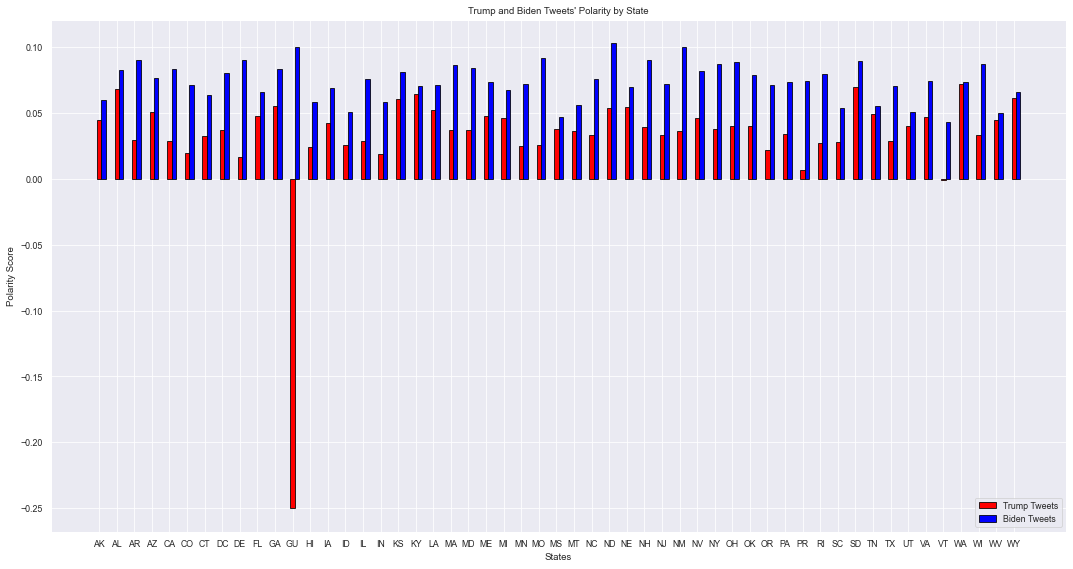

In [51]:
#Plotting the polarity score for Trump and Biden tweets for each state
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(states_pol.index)), height = states_pol["Trump Tweets"], width = width, 
        color = "red", ec = "black", label = "Trump Tweets")

plt.bar(x = np.arange(len(states_pol_jb.index)) + width, height = states_pol["Biden Tweets"], 
        width = width, color = "blue", ec = "black", label = "Biden Tweets")

plt.xticks(np.arange(len(states_pol.index)), list(states_pol.index))

plt.legend(loc = "lower right")

plt.title("Trump and Biden Tweets' Polarity by State")

plt.xlabel("States")

plt.ylabel("Polarity Score")

fig.tight_layout()

plt.show()



Before concluding this data exploration it might also be useful to compare sentiment across the states for both candidates.
As seen by the above graph, tweets directed to Biden, on average, are much more positive than tweets directed to Trump. 
In conjuction with the above frequency distributions and the p-value, the above graph demonstrates polarity analysis 
on the tweets will be useful in classification. Since the tweets, in this manner, are distinguishable across the two groups
and multiple states, it is sensitive to the user's political affiliation and the tweet's classification (as directed either
towards Trump or Biden). 


### Conclusion


To conclude, the above data exploration shows the use of words to build a classifier is a suitable task. The sentiment
analysis done above indicates a distinct difference in the tweets directed towards Trump and the tweets directed towards
Biden. Furthermore, the state specific analysis also demonstrates further proof of this fact. The WordClouds also provide
motivation for the classifier, however not to the same extent as the sentiment analysis. Finally, the bar charts plotting
the frequency of the top few common words, also provide some insight into the lexicon differences between the tweets. As
such, the above information will be referenced frequently when constructing the classifier. 



# Project 2 - Refined Project 1

## Part 1

### Introduction

The aim of the project is to assess whether tweets can be used as a leading indicator to predict a state's election results. My three independent variables are a tweet's polarity score, the number of likes a tweet recieved, and the number of retweets a tweet recieved. My depedent variable is the state's election results. The tweet's polarity score is calculated using Textblob to conduct sentiment analysis. By considering only positive polarity tweets, we can eliminate tweets from non-supporters. The tweets are likely to serve as an indication for a user's vote towards Trump or Biden and as such can be used to predict a state's election results. I assume each like contributes to a vote. Both datasets are taken from Kaggle and each consist of tweets related to Trump or Biden. 

In [52]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

pd.options.display.float_format = '{0:.4f}'.format
pd.options.mode.chained_assignment = None  # default='warn'

In [53]:
#Load the dataframes 
trump = pd.read_csv('donaldtrump.csv', low_memory = False).copy()

biden = pd.read_csv('joebiden.csv', low_memory = False).copy()

In [54]:
#Filter both dataframes to include tweets only from the United States of America 
trump = trump.query('country == "United States of America"')

biden = biden.query('country == "United States of America"')

In [55]:
#Define a function to remove punctuation, urls, retweets, and numbers 
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text) 
    
    text = re.sub('\n', '', text)
    
    text=re.sub(r'RT[\s]+','',text)

    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [56]:
#Clean the tweets using the previously defined function 
trump['cleaned_tweet'] = trump['tweet'].apply(clean_text)

biden['cleaned_tweet'] = biden['tweet'].apply(clean_text)

In [57]:
#Define a function to remove stopwords and join remanining words into a single sentence 
def filter_join(token):
    
    stop_words = set(stopwords.words('english'))
    
    tweet_complete = []
    
    filtered_tweets = []
    
    for word in token:
        
        if word not in stop_words:
            
            tweet_complete.append(word)
            
        else:
            
            pass
        
    tweet_complete_ = " ".join(tweet_complete)
        
    filtered_tweets.append(tweet_complete_)
        
    return filtered_tweets

In [58]:
#Remove stopwords which have little significance in the tweets
tweets_token_trump = trump['cleaned_tweet'].apply(word_tokenize)

tweets_token_biden = biden['cleaned_tweet'].apply(word_tokenize)

trump['filtered_tweet'] = tweets_token_trump.apply(filter_join)

biden['filtered_tweet'] = tweets_token_biden.apply(filter_join)

In [59]:
#Define a function to remove all instances of lists and convert them to string
def remove_list(text):
    
    text = str(text)[1:-1]
    
    return text

In [60]:
#Apply the above function to the tweets in each dataframe 
trump['filtered_tweet'] = trump['filtered_tweet'].apply(remove_list)

biden['filtered_tweet'] = biden['filtered_tweet'].apply(remove_list)

In [61]:
#Remove tweets that contain 'biden' in Trump tweets and 'trump' in Biden tweets
trump = trump[~(trump['filtered_tweet'].str.contains('biden'))]

biden = biden[~(biden['filtered_tweet'].str.contains('trump'))]

In [62]:
#Remove any unwanted extra spaces and concatenate the words into a single sentence for each tweet 
trump['tokenzied_tweets'] = [" ".join(tweet).split(" ") for tweet in trump['filtered_tweet']] 

biden['tokenzied_tweets'] = [" ".join(tweet).split(" ") for tweet in biden['filtered_tweet']]

In [63]:
#Conduct sentiment analysis on each tweet and store output in the respective dataframe 
trump['Polarity'] = [TextBlob(str(tweet)).sentiment.polarity for tweet in trump['filtered_tweet']]
trump['Subjectivity'] = [TextBlob(str(tweet)).sentiment.subjectivity for tweet 
                         in trump['filtered_tweet']]
    
biden['Polarity'] = [TextBlob(str(tweet)).sentiment.polarity for tweet in biden['filtered_tweet']]
biden['Subjectivity'] = [TextBlob(str(tweet)).sentiment.subjectivity for tweet 
                         in biden['filtered_tweet']]

In [64]:
#Convert the polarity score into a more easily interpretable variable
pol_trump = []

pol_biden = []

for score in trump['Polarity']:
    
    if score > 0:
        
        pol_trump.append('Positive')
    
    elif score == 0:
        
        pol_trump.append('Neutral')
        
    else:
        
        pol_trump.append('Negative')
        

for score in biden['Polarity']:
    
    if score > 0:
        
        pol_biden.append('Positive')
    
    elif score == 0:
        
        pol_biden.append('Neutral')
        
    else:
            
        pol_biden.append('Negative')

In [65]:
#Count the number of tweets with a negative, neutral, or positive polarity 
pol_count_trump = sorted(Counter(pol_trump).items())

pol_count_biden = sorted(Counter(pol_biden).items())

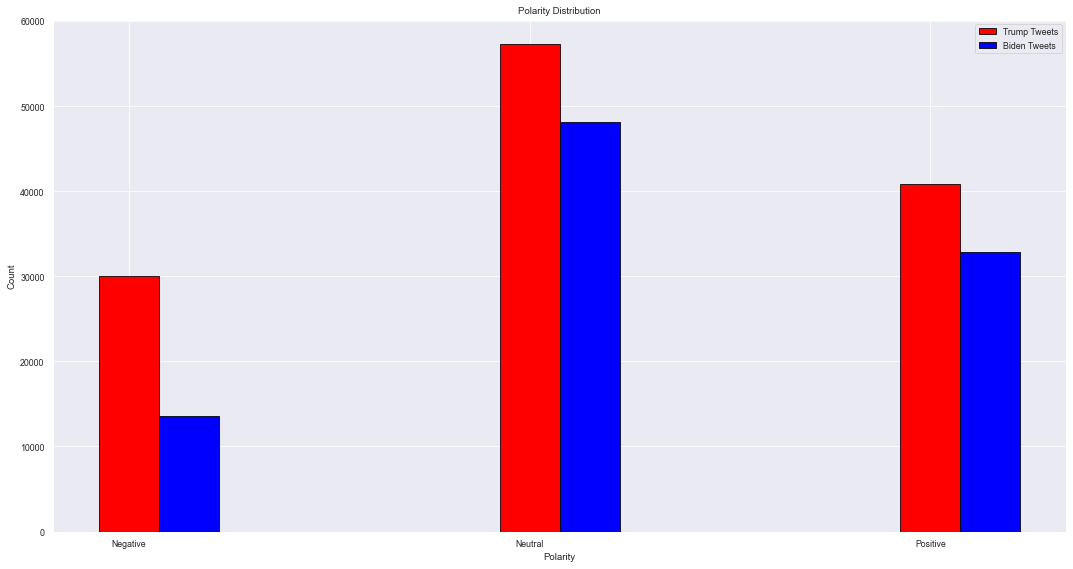

In [66]:
#Plot the above calculated data for Trump and Biden in a single bar chart 
width = 0.15

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(pol_count_trump)), height = [tup[1] for tup in pol_count_trump], 
        width = width,  color = "red", ec = "black", label = "Trump Tweets")

plt.bar(x = np.arange(len(pol_count_biden)) + width, height =  [tup[1] for tup in pol_count_biden], 
        width = width, color = "blue", ec = "black", label = "Biden Tweets")

plt.xticks(np.arange(len(pol_count_trump)), [tup[0] for tup in pol_count_trump])

plt.legend(loc = 'best')

plt.title('Polarity Distribution')

plt.ylabel('Count')

plt.xlabel('Polarity')

fig.tight_layout()

plt.show()

The above graph plots the number of tweets with a negative, neutral, or a positive polarity for Trump and Biden. Per the above graph, there are a considerable number of non-positive polarity tweets in each dataframe. Since we only want to analyze tweets from supporters, it is important to consider tweets with a positive polarity score only. 

In [67]:
#Filter the dataset to include only positive polarity tweets representing supporters 
trump = trump.loc[trump['Polarity'] > 0]

biden = biden.loc[biden['Polarity'] > 0]

In [68]:
#Creating a list of tweets exclusively for the WordCloud for both dataframes 
tweet_wc_trump = []

tweet_wc_biden = []

for tweet in trump['filtered_tweet']:
    
    tweet_wc_trump.append(tweet)
    
for tweet in biden['filtered_tweet']:
    
    tweet_wc_biden.append(tweet)

In [69]:
#Instantiate the WordClouds for both dataframes 
wc_trump = WordCloud(width = 750, height = 500, 
                  random_state = 1001, max_font_size = 100, 
                     max_words = 150, background_color = 'white').generate(str(tweet_wc_trump))

wc_biden = WordCloud(width = 750, height = 500, 
                  random_state = 1001, max_font_size = 100, 
                     max_words = 150, background_color = 'white').generate(str(tweet_wc_biden))

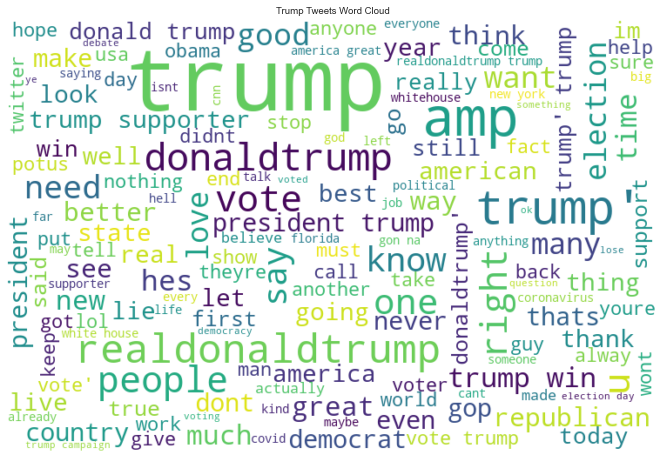

In [70]:
#Plot the Trump WordCloud 
plt.figure(figsize = (15,8))

plt.axis('off')

plt.imshow(wc_trump, interpolation = "bilinear")

plt.title('Trump Tweets Word Cloud')

plt.show()

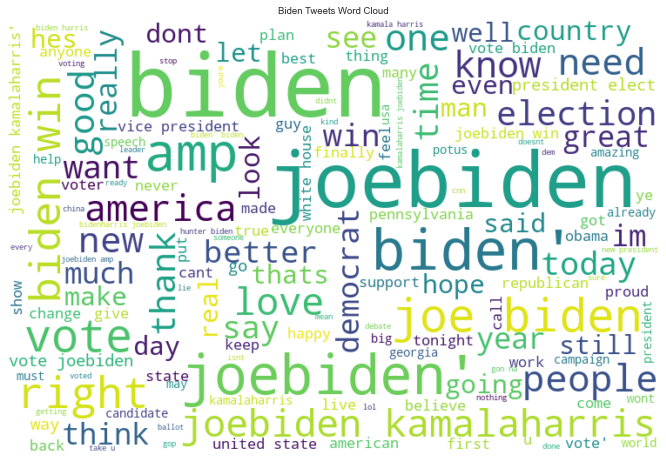

In [71]:
#Plot the Biden WordCloud 
plt.figure(figsize = (15,8))

plt.axis('off')

plt.imshow(wc_biden, interpolation = "bilinear")

plt.title('Biden Tweets Word Cloud')

plt.show()

I have chosen to include the above WordClouds to ensure that only positve sentiment tweets are being considered, to represent supporters. In both images, positive words such as 'good', 'great', 'support' are abundant. Moreover, each WordCloud has at least one mentioned instance of the corresponding party (i.e. Trump tweets WordCloud mentions Republican and Biden tweets WordCloud mentions Democratic). This ensures the tweets have been filtered correctly and we can proceed. 

Relative to my previous version, I have refined this graph by including only positive polarity tweets in the WordCloud, added a title, and removed the axes. I have also changed the background to white to make the image clearer.

### Summary Statistics

In [72]:
#Convert data type from object to int for both dataframes 
trump['likes'] = trump['likes'].astype(int)

biden['likes'] = biden['likes'].astype(int)

In [73]:
#Remove subjectivity summary statistics from both dataframes
sum_stats_trump = trump.describe().iloc[:, :-1]

sum_stats_biden = biden.describe().iloc[:, :-1]

In [74]:
#Rename the columns 
sum_stats_trump.columns = ['Trump Likes', 'Trump Retweets', 'Trump Polarity']

sum_stats_biden.columns = ['Biden Likes', 'Biden Retweets', 'Biden Polarity']

In [75]:
#Concatenate the above output into a single dataframe 
sum_stats = pd.concat([sum_stats_trump, sum_stats_biden], axis =1)

In [76]:
sum_stats

Trump Likes  Trump Retweets  Trump Polarity  Biden Likes  \
count   40829.0000      40829.0000      40829.0000   32837.0000   
mean        9.6852          2.3172          0.2974      21.4005   
std       209.9079         47.2891          0.2262     626.4747   
min         0.0000          0.0000          0.0000       0.0000   
25%         0.0000          0.0000          0.1250       0.0000   
50%         0.0000          0.0000          0.2444       1.0000   
75%         1.0000          0.0000          0.4000       2.0000   
max     23225.0000       5324.0000          1.0000   59403.0000   

       Biden Retweets  Biden Polarity  
count      32837.0000      32837.0000  
mean           4.1725          0.3405  
std           81.1492          0.2358  
min            0.0000          0.0000  
25%            0.0000          0.1500  
50%            0.0000          0.2857  
75%            0.0000          0.5000  
max         7489.0000          1.0000

The above table simply shows the summary statistics of the independent variables I intend to use to analyze whether tweets can be used as a leading indicator for a state's election results. 

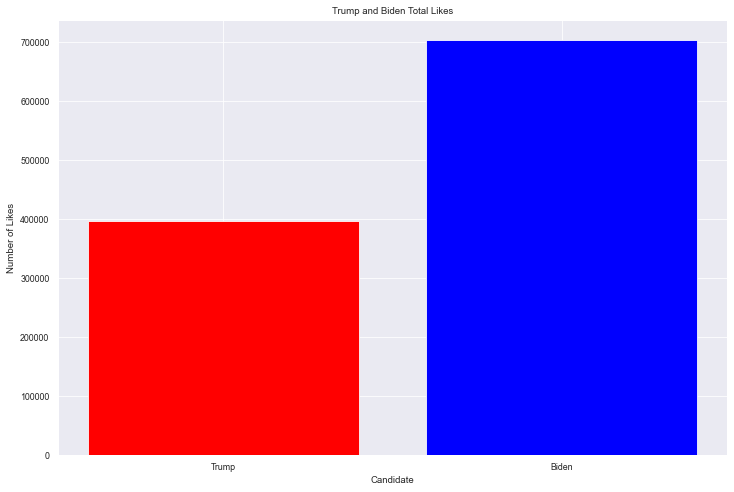

In [77]:
#Plot the total number of likes in each dataframe 
fig = plt.figure(figsize = (12,8))

plt.bar(x = ['Trump', 'Biden'], height = [trump['likes'].sum(), 
                                          biden['likes'].sum()], color = ['red', 'blue'])


plt.title('Trump and Biden Total Likes')

plt.ylabel('Number of Likes')

plt.xlabel('Candidate')

plt.show()

The above bar graph displays the total number of likes each tweet recieved in the respective dataframe, irrespective of the state. This paints a crude picture of whether the tweets can be used as a leading indicator. Clearly, Biden has far more likes than Trump and was the election winner. As such, the likes each tweet recieved can be loosely interpreted as a vote. 

In [78]:
#Filter both dataframes to exclude any outliers
cond1_trump = trump['likes'] > trump['likes'].quantile(0.01)
cond2_trump = trump['likes'] < trump['likes'].quantile(0.99)

cond1_biden = biden['likes'] > biden['likes'].quantile(0.01)
cond2_biden = biden['likes'] < biden['likes'].quantile(0.99)

likes_trump = list(trump[cond1_trump & cond2_trump]['likes'])

likes_biden = list(biden[cond1_biden & cond2_biden]['likes'])

In [79]:
#Create a dataframe holding the number of likes for Trump and Biden 
likes_trump_biden = pd.DataFrame({'Trump': pd.Series(likes_trump), 'Biden': pd.Series(likes_biden)})

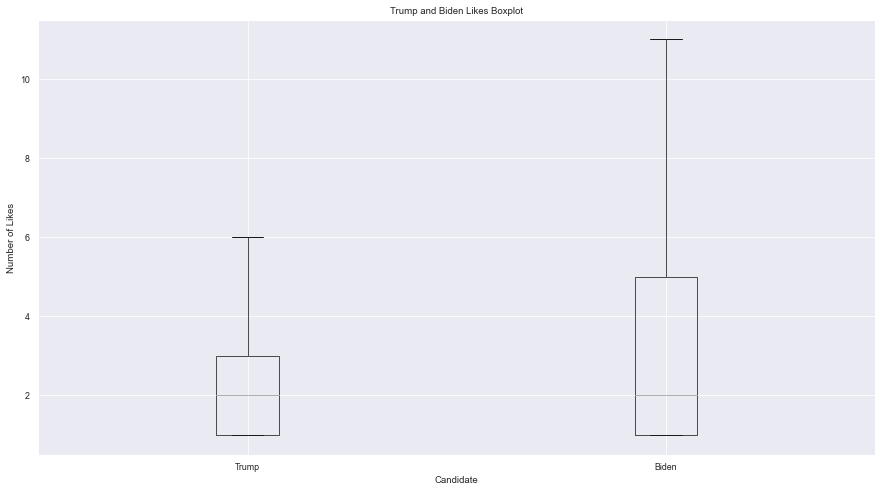

In [80]:
#Plot a boxplot excluding any outliers 
fig = plt.figure(figsize = (15,8))

likes_trump_biden.boxplot(showfliers = False)

plt.title('Trump and Biden Likes Boxplot')

plt.ylabel('Number of Likes')

plt.xlabel('Candidate')

plt.show()

The above graph plots the boxplot of the likes Trump and Biden tweets recieved. From the graph, although Trump and Biden tweets have the same median number of likes, Biden tweets have a greater number of positive outliers evident by a higher 75% quartile relative to Trump tweets. This reinforces what we observed in the 'Trump and Biden Total Likes' graph. A like can be interpreted as a single vote since the election winner, Biden, had a greater number of total likes and outliers relative to Trump. 

In [81]:
#Convert datatype from object to int
trump['retweet_count'] = trump['retweet_count'].astype(int)

biden['retweet_count'] = biden['retweet_count'].astype(int)

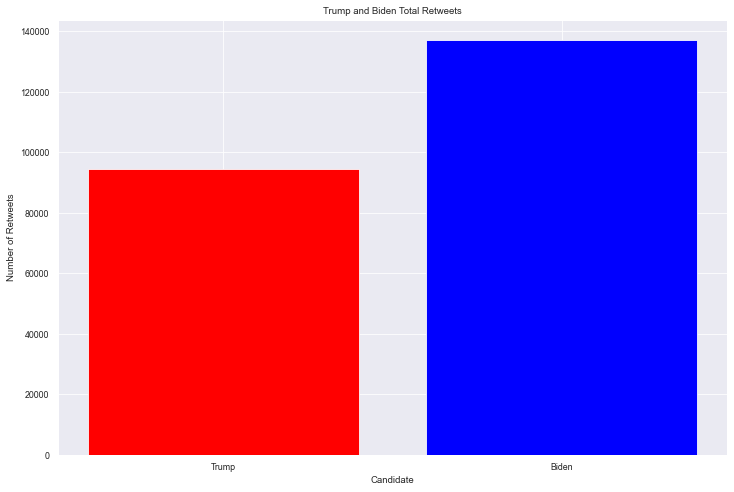

In [82]:
#Plot the total number of retweets in each dataframe 
fig = plt.figure(figsize = (12,8))

plt.bar(x = ['Trump', 'Biden'], height = [trump['retweet_count'].sum(), 
                                          biden['retweet_count'].sum()], color = ['red', 'blue'])


plt.title('Trump and Biden Total Retweets')

plt.ylabel('Number of Retweets')

plt.xlabel('Candidate')

plt.show()

The above graph paints a similar picture as 'Trump and Biden Total Likes' graph. The total number of retweets are clearly greater for Biden than Trump. As such, since Biden was the election winner, total retweets can be used as another acceptable independent variable to determine a state's election results. 

In [83]:
#Filter both dataframes to exclude any outliers
cond1_trump = trump['retweet_count'] > trump['retweet_count'].quantile(0.01)
cond2_trump = trump['retweet_count'] < trump['retweet_count'].quantile(0.99)

cond1_biden = biden['retweet_count'] > biden['retweet_count'].quantile(0.01)
cond2_biden = biden['retweet_count'] < biden['retweet_count'].quantile(0.99)

retweet_trump = list(trump[cond1_trump & cond2_trump]['retweet_count'])

retweet_biden = list(biden[cond1_biden & cond2_biden]['retweet_count'])

In [84]:
#Create a dataframe holding the number of likes for Trump and Biden 
retweets_trump_biden = pd.DataFrame({'Trump': pd.Series(retweet_trump), 
                                     'Biden': pd.Series(retweet_biden)})

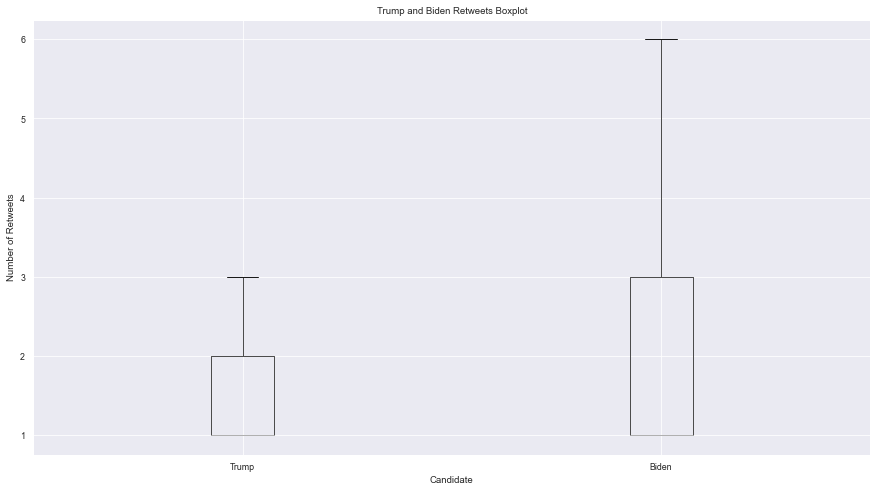

In [85]:
#Plot a boxplot excluding any outliers 
fig = plt.figure(figsize = (15,8))

retweets_trump_biden.boxplot(showfliers = False)

plt.title('Trump and Biden Retweets Boxplot')

plt.ylabel('Number of Retweets')

plt.xlabel('Candidate')

plt.show()

The above graph paints a similar picture as 'Trump and Biden Likes Boxplot' graph. Despite having the same median, Biden tweets have a much larger 75% quartile, implying a greater number of positive outliers. As such, the number of retweets have influenced the election results by a similar reasoning provided under 'Trump and Biden Likes Boxplot'.

In [86]:
#Group the total number of likes by state for each dataframe and concatenate into a single dataframe 
likes_trump = trump[['likes', 'state_code']].groupby('state_code').sum()['likes']

likes_biden = biden[['likes', 'state_code']].groupby('state_code').sum()['likes']

likes = pd.concat([likes_trump, likes_biden], axis = 1)

likes.columns = ['Trump Likes', 'Biden Likes']

In [87]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(likes.index):
    
    if state not in non_us:
        
        states.append(state)
        
likes = likes.loc[states, :]

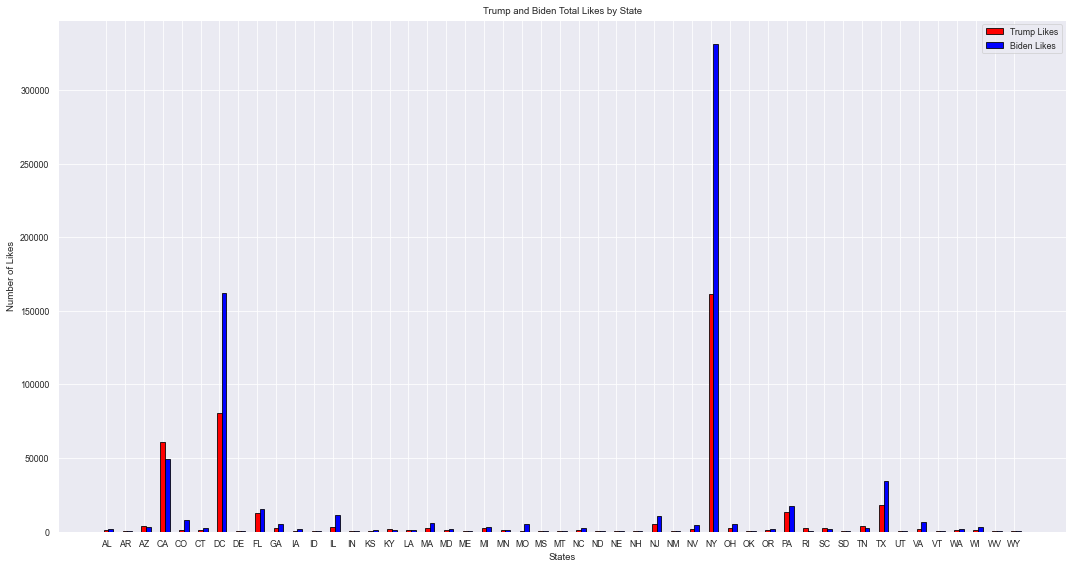

In [88]:
#Plotting the total number of likes for Trump and Biden tweets for each state
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(likes.index)), height = likes['Trump Likes'], width = width, 
        color = 'red', ec = 'black', label = 'Trump Likes')

plt.bar(x = np.arange(len(likes.index)) + width, height = likes['Biden Likes'], 
        width = width, color = 'blue', ec = 'black', label = 'Biden Likes')

plt.xticks(np.arange(len(likes.index)), list(likes.index))

plt.legend(loc = 'upper right')

plt.title('Trump and Biden Total Likes by State')

plt.xlabel('States')

plt.ylabel('Number of Likes')

plt.tight_layout()

plt.show()

The above graph plots the total number of likes Trump and Biden tweets recieved in each state. Attention is immediately drawn to New York which has a substantially greater number of likes for Biden relative to Trump. Here, the likes are an accurate representation of the state's election results since New York voted Democratic. However, if one looks at Florida, for instance, although Biden has greater number of likes, Florida voted Republican. This is evidence that likes cannot alone be used as a indicator for a state's election results. 

In [89]:
#Group the total number of retweets by state for each dataframe and concatenate into a single dataframe 
retweets_trump = trump[['retweet_count', 'state_code']].groupby('state_code').sum()['retweet_count']

retweets_biden = biden[['retweet_count', 'state_code']].groupby('state_code').sum()['retweet_count']

retweets = pd.concat([retweets_trump, retweets_biden], axis = 1)

retweets.columns = ['Trump Retweets', 'Biden Retweets']

In [90]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(likes.index):
    
    if state not in non_us:
        
        states.append(state)
        
retweets = retweets.loc[states, :]

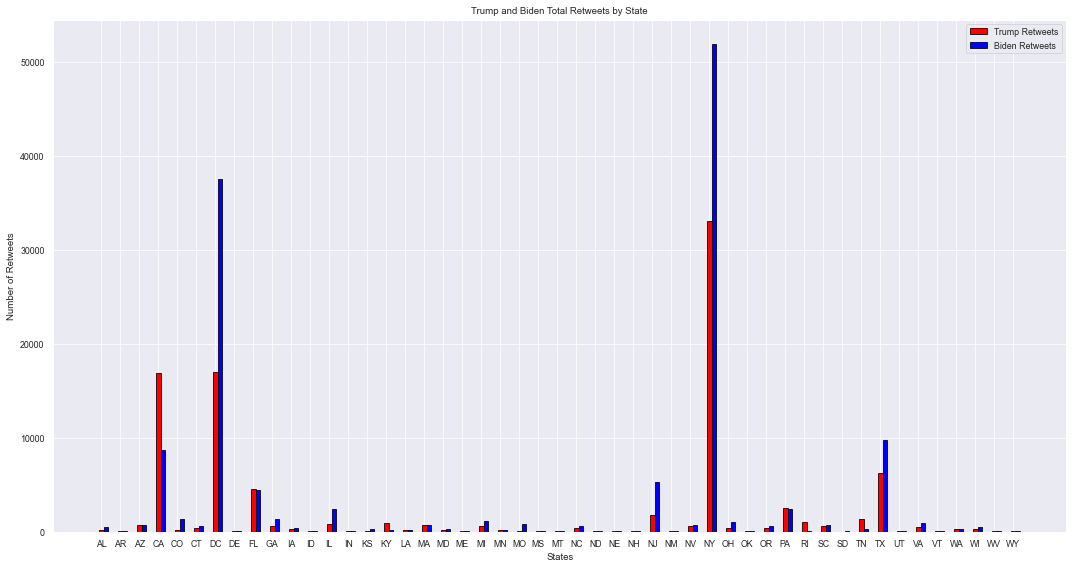

In [91]:
#Plotting the total retweets for Trump and Biden tweets for each state
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(retweets.index)), height = retweets['Trump Retweets'], width = width, 
        color = 'red', ec = 'black', label = 'Trump Retweets')

plt.bar(x = np.arange(len(retweets.index)) + width, height = retweets['Biden Retweets'], 
        width = width, color = 'blue', ec = 'black', label = 'Biden Retweets')

plt.xticks(np.arange(len(retweets.index)), list(retweets.index))

plt.legend(loc = 'upper right')

plt.title('Trump and Biden Total Retweets by State')

plt.xlabel('States')

plt.ylabel('Number of Retweets')

plt.tight_layout()

plt.show()

The above graph plots the total retweets Trump and Biden tweets recieved. Continuing the above discussion, lets focus on Florida. In this graph, Trump tweets have a slightly larger number of retweets in Florida relative to Biden. Here, the retweets instead paint an acurrate picture of Florida's election results relative to total likes, in the previous graph. This reinforces my choices for independent variables since they both seem to have a tangible impact on the election results. 

I have refined this graph by choosing a clearer background and removing the grid. I have only considered positive polarity tweets so no bar goes below the zero-axis as in my previous graph. 

### Summary and Conclusion

Above, I explored the tweets, likes, and retweets in both dataframes to assess whether my chosen independent variables influence my dependent variable. I have visualized the data in multiple graphs. The above data exploration shows that likes and the total number of retweets, from positive polarity tweets, do seem to have an impact on the state's election results, although more visualization and analysis is required. However, insofar the choice of indepedent variables is suitable for the dependent variable. Note that the independent variables are able to better predict the election outcome for Democratic states relative to Republican tweets due to the data being more positive for Biden tweets relative to Trump tweets. 

# Project 2

### Introduction

Here, I will continue the above data visualization, in Project 1, but I will use the election results dataframe as well. This dataset is taken from the MIT ElectionLab website. This dataframe consists of the presedential election results from 1976 to 2020, although only the 2020 election results will be considered. In addition, the dataset lists the candidate and party of interest along with the votes each candidate recieved. Moreover, the dataset also includes the total votes each state recieved. By plotting the candidate votes and comparing it with the above data, in Project 1, on a map, I hope to obtain a clearer visualization of my data and better assess whether more likes and retweets contribute to a candidate's victory in a given state. As before, only positive polarity tweets will be considered to represent supporters. 

## Part Two

### Message

A greater number of likes for a candidate corrrespond to greater support for that respective candidate. As such, states where Biden tweets recieved greater number of likes are where is he most likely to win. The same holds true for Trump tweets. A similar reasoning holds for retweets.

In [92]:
#Count the number of tweets in each state and merge into a single dataframe 
count_trump = pd.DataFrame(trump.groupby('state_code').count()['tweet'])

count_trump.columns = ['Trump']

count_biden = pd.DataFrame(biden.groupby('state_code').count()['tweet'])

count_biden.columns = ['Biden']

count = pd.merge(count_trump, count_biden, on = 'state_code')

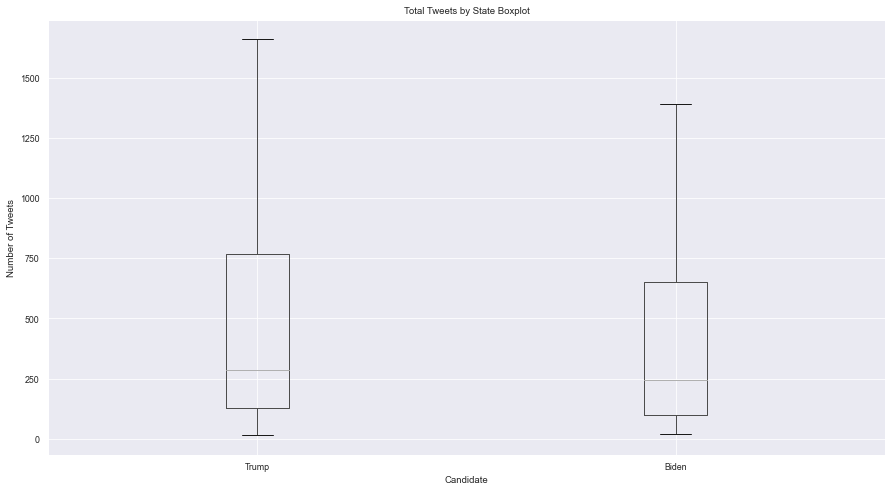

In [93]:
#Plot the above data into a boxplot 
fig = plt.figure(figsize = (15,8))

count.boxplot(showfliers = False)

plt.title('Total Tweets by State Boxplot')

plt.ylabel('Number of Tweets')

plt.xlabel('Candidate')

#plt.grid()

plt.show()

The graph plots the number of tweets grouped by state for each candidate. The aim of this graph is to find which candidate is referred to the most and whether this necessarily translates into greater total likes and retweets. However, from Project 1 initial bar graphs we can reject this assumption. Thus, it is clear that although Biden is underrepresented in the dataframe, relative to Trump, Biden's data is much more positive than Trump. This hints towards an aggregate victory for Biden. 

I have refined this graph, relative to my paper version, by including appropriate tick labels for the y-axis and a grid to better compare the differences between both boxplots. Since this graph is relatively simple, additional details are not required. 

Graph Draft 1.jpg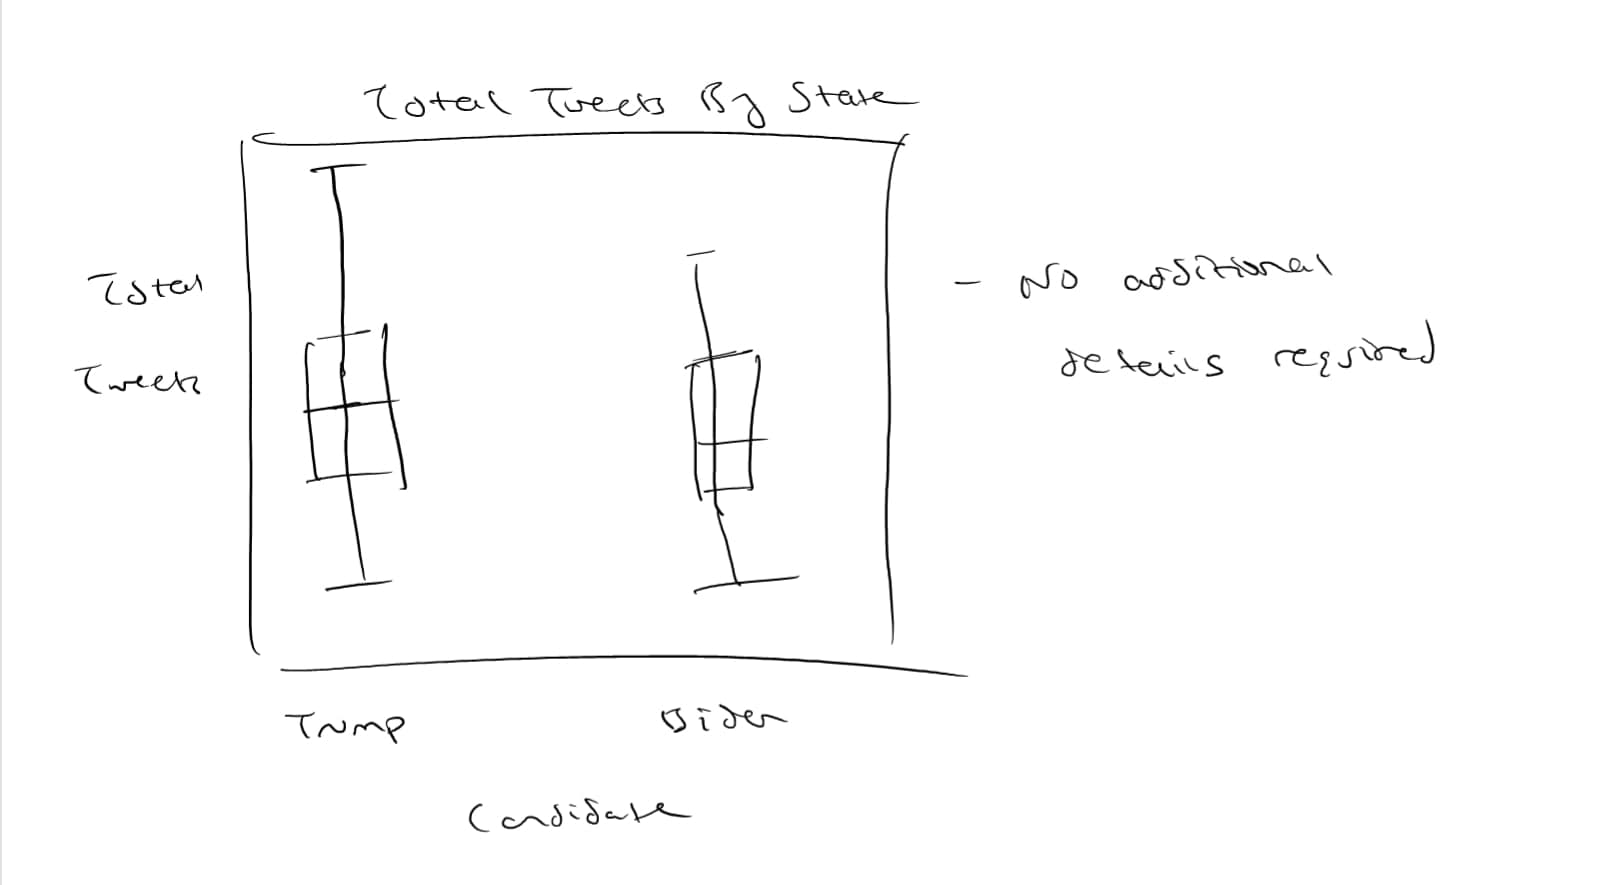

In [94]:
#Extract only date from created_at column
created_at_trump = []

created_at_biden = []

for date in trump['created_at']:
    
    date_ = pd.to_datetime(date)
    
    date_ = date_.date()
    
    created_at_trump.append(date_)
    
for date in biden['created_at']:
    
    date_ = pd.to_datetime(date)
    
    date_ = date_.date()
    
    created_at_biden.append(date_)

In [95]:
#Calculate the cumulative likes each candidate recieved daily
trump['created_at'] = created_at_trump

cum_likes_trump = trump.groupby('created_at').sum()['likes'].cumsum()

biden['created_at'] = created_at_biden

cum_likes_biden = biden.groupby('created_at').sum()['likes'].cumsum()

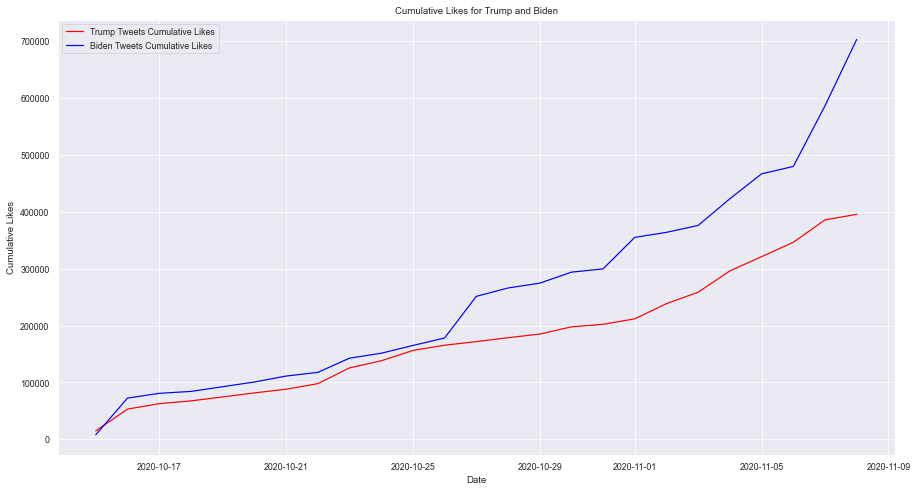

In [96]:
#Plot the cumulative likes 
fig = plt.figure(figsize = (15,8))

plt.plot(cum_likes_trump, color = 'red', label = 'Trump Tweets Cumulative Likes')

plt.plot(cum_likes_biden, color = 'blue', label = 'Biden Tweets Cumulative Likes')

plt.title('Cumulative Likes for Trump and Biden')

plt.ylabel('Cumulative Likes')

plt.xlabel('Date')

plt.legend(loc = 'best')

plt.show()

The graph plots the cumulative likes Trump and Biden tweets recieved over time. As can be seen, Biden tweets, in the final few days, realize a steep upwards trajectory whereas Trump tweets stay relatively stable. The steepness of the final part of Biden's line graph represents support growing relatively quicker for Biden. As such, this hints towards a victory for Biden.

I have refined this graph, relative to my paper version, by adding a legend in an appropriate location and including tick labels for the date and cumulative likes. Due to the simplicity of the graph, no additional components need to be added. 

Graph Draft 2.jpg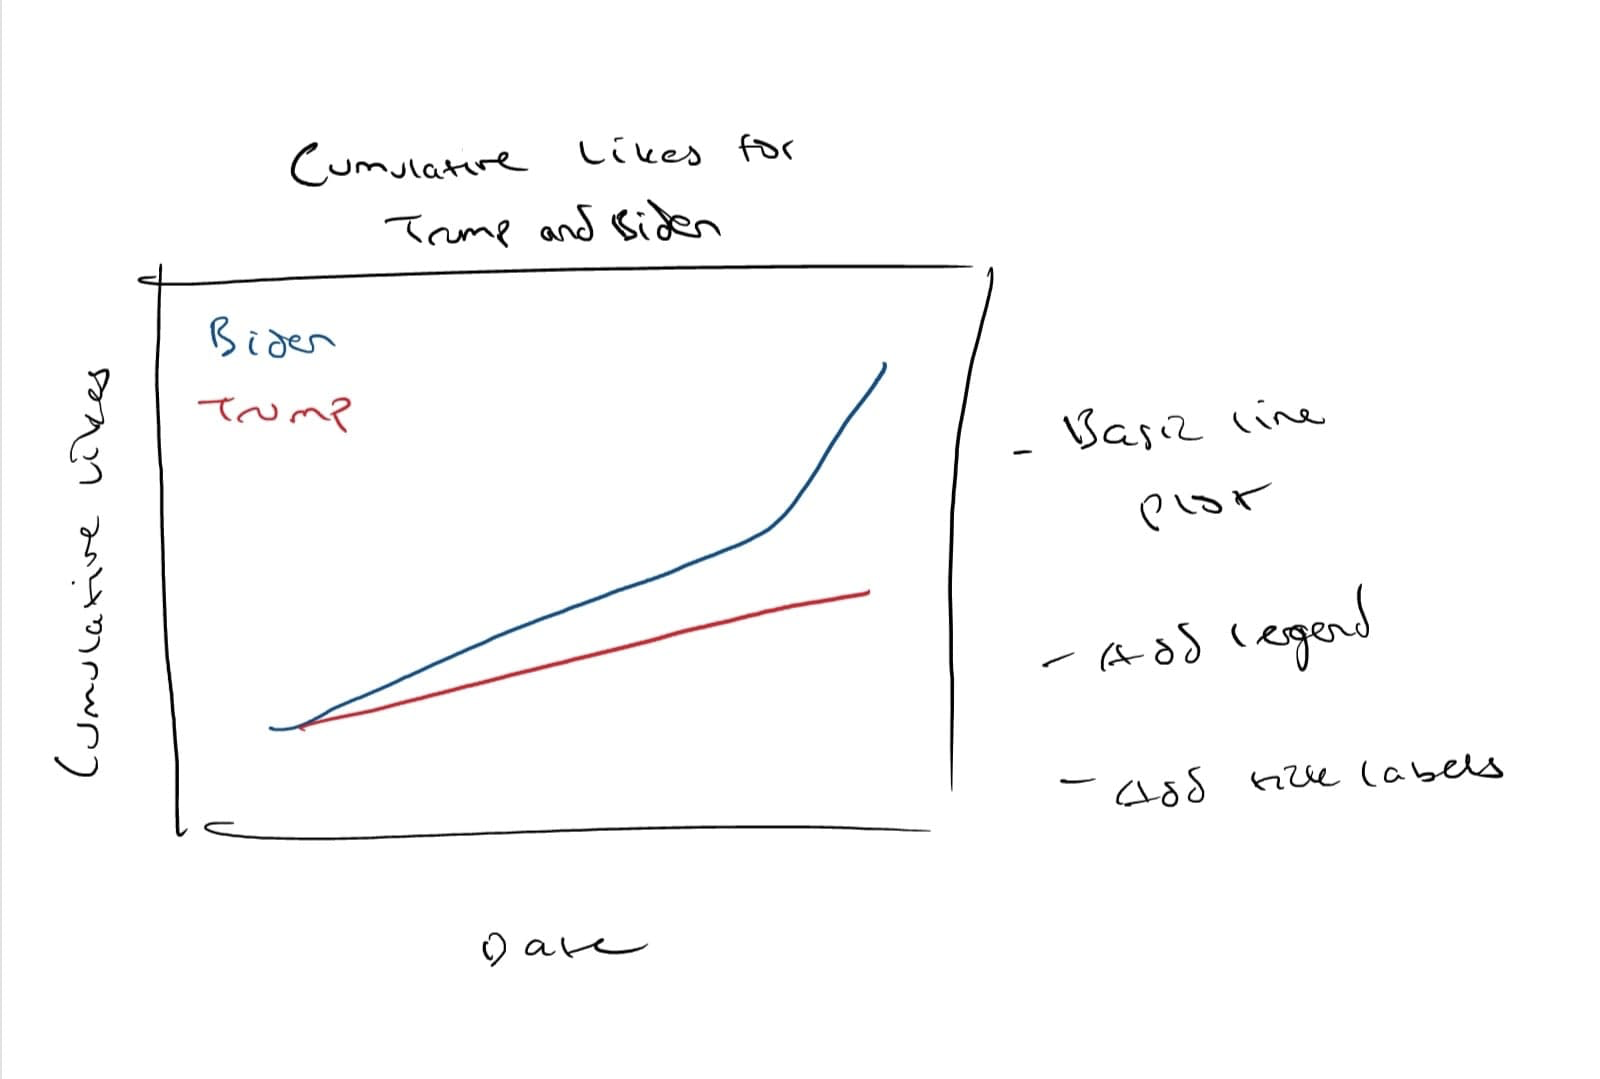

### Part Three

In [97]:
import geopandas as gpd
from shapely.geometry import Point

In [98]:
#Count the number of likes in each state
likes_trump = trump.groupby('state_code').sum()['likes']

likes_biden = biden.groupby('state_code').sum()['likes']

In [99]:
#Concatenate the above output into a single dataframe
likes = pd.DataFrame({'Trump': pd.Series(likes_trump), 'Biden': pd.Series(likes_biden)})

In [100]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(count_biden.index):
    
    if state not in non_us:
        
        states.append(state)
        
likes = likes.loc[states, :]

In [101]:
#Reset the index and rename the column
likes.reset_index(inplace = True)

likes.rename(columns = {'index':'STUSPS'}, inplace = True)

In [102]:
#Read in the shape file
states_ = gpd.read_file('cb_2018_us_state_500k.shp')

states_ = states_.to_crs('EPSG:3395')

In [103]:
#Merge the count_biden dataframe with the states shapefile
likes_map = pd.merge(likes, states_, on = 'STUSPS')

likes_map = gpd.GeoDataFrame(likes_map)

In [104]:
#Helps to fit the color bar to the height of the map
from mpl_toolkits.axes_grid1 import make_axes_locatable

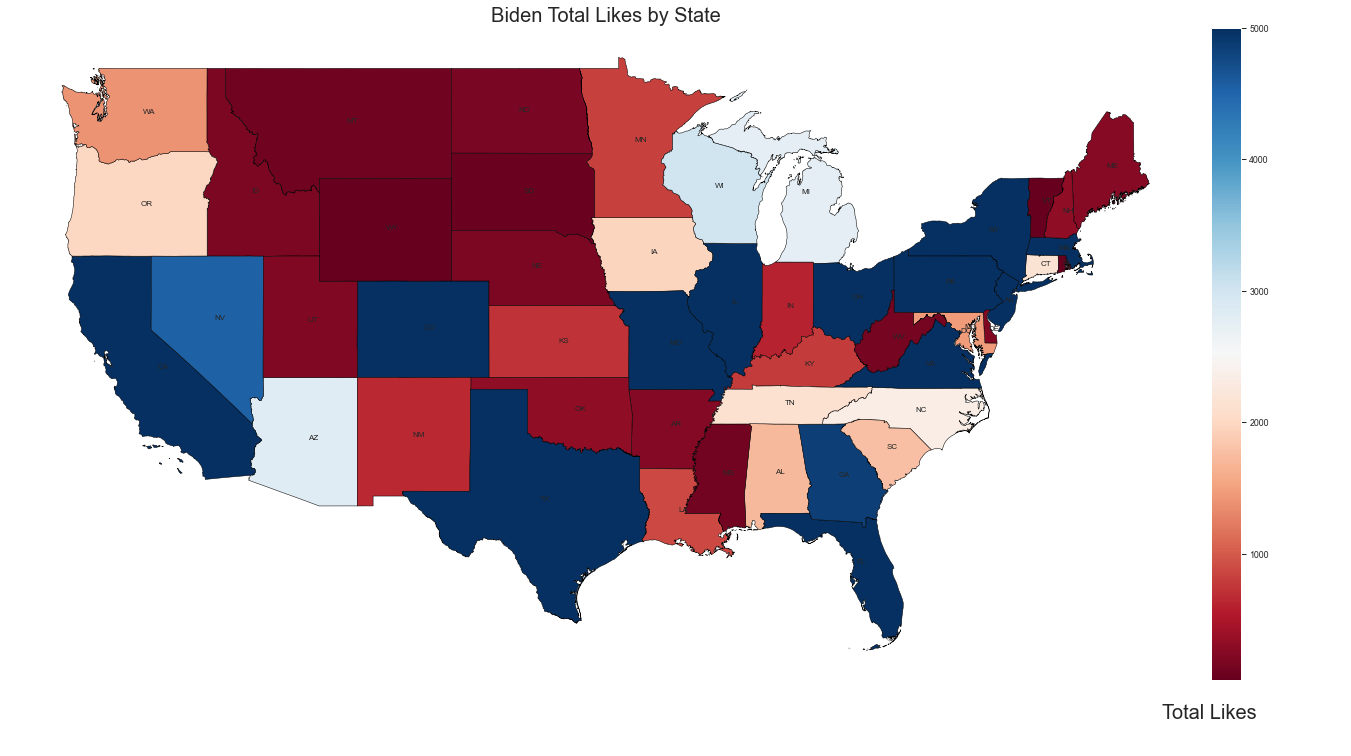

In [105]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

#Chosen 5000 to cap the color bar to limit extremely high level of likes from distorting the map
likes_map.plot(column = 'Biden', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu', legend = True, 
               cax = cax, vmax = 5000)

for state, geometry in zip(likes_map['STUSPS'], likes_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Biden Total Likes by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Total Likes', xy=(0.86, 0.05),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

The above graph plots the total likes Biden tweets recieved by state. Only positive polarity tweets are considered. States with lower total likes are red whereas states with higher total likes are blue. The above map looks considerably similar to election results, where the middle states voted Republican and states such as California and New York voted Democratic. The pale red states, such as Orlando and Washington also voted Democratic. There are certain states such as Texas and Florida which are outliers since Trump won in these states but are colored blue. A similar analysis can be conducted for Trump but for brevity has been omitted.

Notice this map shows a similar relationship as to what we observed in Project 1. The total likes continue to have a tangible impact on the state's election results, especially those which voted Democratic. Notice that the color map has been capped at 5000 since otherwise certain states, such as New York, where tweets recieved numerous likes, can easily distort the visualization, for instance, by coloring states such as Ilinois and Ohio in red. 

*I have dropped all non-continental states to obtain a clearer visualization of my data and focus on the core states rather than outlying states which add little significance to my research question. 

In [106]:
#Load in election results dataset
results = pd.read_csv('1976-2020-president.csv').query(
    'year == "2020"')[['state_po', 'party_simplified','candidatevotes']]

In [107]:
#Filter the dataset to include only Republican and Democratic Votes
results_trump = results.query('party_simplified == "REPUBLICAN"') 

results_biden = results.query('party_simplified == "DEMOCRAT"')

results_trump.rename(columns = {'candidatevotes':'Trump Votes'}, inplace = True)

results_trump.drop(columns = 'party_simplified', inplace = True)

results_biden.rename(columns = {'candidatevotes':'Biden Votes'}, inplace = True)

results_biden.drop(columns = 'party_simplified', inplace = True)

In [108]:
#Merge the above output into a single dataframe and set the states to be the index
results = pd.merge(results_trump, results_biden, on = 'state_po')

results.set_index('state_po', inplace = True)

In [109]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(results.index):
    
    if state not in non_us:
        
        states.append(state)
        
results = results.loc[states, :]

In [110]:
#Reset and rename column
results.reset_index(inplace = True)

results.rename(columns = {'state_po':'STUSPS'}, inplace = True)

In [111]:
#Calculate the percentage of total votes each candidate recieved 
results['Trump Percentage'] = results['Trump Votes']/(results['Trump Votes'] + results['Biden Votes'])

results['Biden Percentage'] = results['Biden Votes']/(results['Trump Votes'] + results['Biden Votes'])

In [112]:
#Merge the above output with the states shape file 
results_map = pd.merge(results, states_, on = 'STUSPS')

results_map = gpd.GeoDataFrame(results_map)

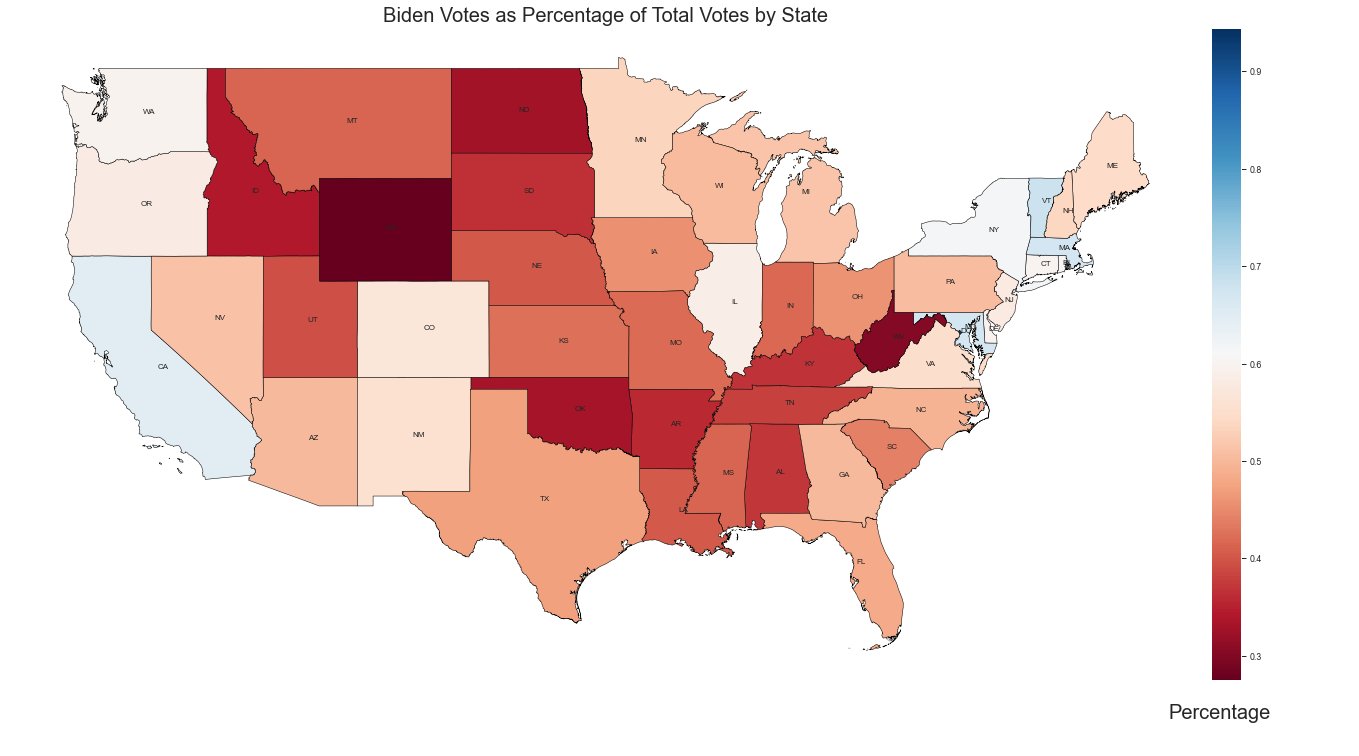

In [113]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

results_map.plot(column = 'Biden Percentage', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu', legend = True, cax = cax)

for state, geometry in zip(results_map['STUSPS'], results_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Biden Votes as Percentage of Total Votes by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Percentage', xy=(0.86, 0.05),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

The above map plots the votes Biden recieved as a percentage of total votes in each state. This map is very similar to 'Biden Total Likes by State' graph. The middle states are red, implying a low voting percentage for Biden and a higher voting percentage for Trump. The lightly colored states, which represent a victory for Biden, coincide with what was observed in the previous graph. For instance, California's color in both graphs represent a victory for Biden. Pale states such as Washington and Orlando also coincide with the results observed in the previous graph. This shows that the total likes serve as an accurate indicator for predicting victory for Biden. The graph for Trump is not shown since it is the same as Biden's due to the election being a zero-sum game (i.e. wherever Biden recieved lower percentage of votes, Trump recieved a greater percentage and by reversing the color scheme the same graph is obtained). 

### Summary and Conclusion

After merging my initial dataframes with the election results, a clear correlation can be seen between my independent variables and my outcome. The initial two graphs, in Part 2, show overwhelming support for Biden, in terms of likes, despite Trump having a greater number of tweets on average. The map visualizations, in Part 3, are also able to show this correlation. States where Biden won, represented by the pale colored states in the second map, coincide with the states where Biden recieved more likes, represented by the blue colored states in the initial map. As such, the total number of likes each candidate tweets recieved can be used as a leading indicator for predicting a states's elections results. 

# Project 3

## Part One

# Project 2 - Refined Project 1

## Part 1

### Introduction

The aim of the project is to assess whether tweets can be used as a leading indicator to predict a state's election results. My three independent variables are a tweet's polarity score, the number of likes a tweet recieved, and the number of retweets a tweet recieved. My depedent variable is the state's election results. The tweet's polarity score is calculated using Textblob to conduct sentiment analysis. By considering only positive polarity tweets, we can eliminate tweets from non-supporters. The tweets are likely to serve as an indication for a user's vote towards Trump or Biden and as such can be used to predict a state's election results. I assume each like contributes to a vote. Both datasets are taken from Kaggle and each consist of tweets related to Trump or Biden. 

In [165]:
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

pd.options.display.float_format = '{0:.4f}'.format
pd.options.mode.chained_assignment = None  # default='warn'

In [166]:
#Load the dataframes 
trump = pd.read_csv('donaldtrump.csv', low_memory = False).copy()

biden = pd.read_csv('joebiden.csv', low_memory = False).copy()

In [167]:
#Filter both dataframes to include tweets only from the United States of America 
trump = trump.query('country == "United States of America"')

biden = biden.query('country == "United States of America"')

In [168]:
#Define a function to remove punctuation, urls, retweets, and numbers 
def clean_text(text):
    
    text = str(text).lower()
    
    text = re.sub('\[.*?\]', '', text)
    
    text = re.sub('https?://\S+|www\.\S+', '', text)
    
    text = re.sub('<.*?>+', '', text)
    
    text = re.sub(r'[^\w\s]', '', text) 
    
    text = re.sub('\n', '', text)
    
    text=re.sub(r'RT[\s]+','',text)

    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [169]:
#Clean the tweets using the previously defined function 
trump['cleaned_tweet'] = trump['tweet'].apply(clean_text)

biden['cleaned_tweet'] = biden['tweet'].apply(clean_text)

In [170]:
#Define a function to remove stopwords and join remanining words into a single sentence 
def filter_join(token):
    
    stop_words = set(stopwords.words('english'))
    
    tweet_complete = []
    
    filtered_tweets = []
    
    for word in token:
        
        if word not in stop_words:
            
            tweet_complete.append(word)
            
        else:
            
            pass
        
    tweet_complete_ = " ".join(tweet_complete)
        
    filtered_tweets.append(tweet_complete_)
        
    return filtered_tweets

In [171]:
#Remove stopwords which have little significance in the tweets
tweets_token_trump = trump['cleaned_tweet'].apply(word_tokenize)

tweets_token_biden = biden['cleaned_tweet'].apply(word_tokenize)

trump['filtered_tweet'] = tweets_token_trump.apply(filter_join)

biden['filtered_tweet'] = tweets_token_biden.apply(filter_join)

In [172]:
#Define a function to remove all instances of lists and convert them to string
def remove_list(text):
    
    text = str(text)[1:-1]
    
    return text

In [173]:
#Apply the above function to the tweets in each dataframe 
trump['filtered_tweet'] = trump['filtered_tweet'].apply(remove_list)

biden['filtered_tweet'] = biden['filtered_tweet'].apply(remove_list)

In [174]:
#Remove tweets that contain 'biden' in Trump tweets and 'trump' in Biden tweets
trump = trump[~(trump['filtered_tweet'].str.contains('biden'))]

biden = biden[~(biden['filtered_tweet'].str.contains('trump'))]

In [175]:
#Remove any unwanted extra spaces and concatenate the words into a single sentence for each tweet 
trump['tokenzied_tweets'] = [" ".join(tweet).split(" ") for tweet in trump['filtered_tweet']] 

biden['tokenzied_tweets'] = [" ".join(tweet).split(" ") for tweet in biden['filtered_tweet']]

In [176]:
#Conduct sentiment analysis on each tweet and store output in the respective dataframe 
trump['Polarity'] = [TextBlob(str(tweet)).sentiment.polarity for tweet in trump['filtered_tweet']]
trump['Subjectivity'] = [TextBlob(str(tweet)).sentiment.subjectivity for tweet 
                         in trump['filtered_tweet']]
    
biden['Polarity'] = [TextBlob(str(tweet)).sentiment.polarity for tweet in biden['filtered_tweet']]
biden['Subjectivity'] = [TextBlob(str(tweet)).sentiment.subjectivity for tweet 
                         in biden['filtered_tweet']]

In [177]:
#Convert the polarity score into a more easily interpretable variable
pol_trump = []

pol_biden = []

for score in trump['Polarity']:
    
    if score > 0:
        
        pol_trump.append('Positive')
    
    elif score == 0:
        
        pol_trump.append('Neutral')
        
    else:
        
        pol_trump.append('Negative')
        

for score in biden['Polarity']:
    
    if score > 0:
        
        pol_biden.append('Positive')
    
    elif score == 0:
        
        pol_biden.append('Neutral')
        
    else:
            
        pol_biden.append('Negative')

In [178]:
#Count the number of tweets with a negative, neutral, or positive polarity 
pol_count_trump = sorted(Counter(pol_trump).items())

pol_count_biden = sorted(Counter(pol_biden).items())

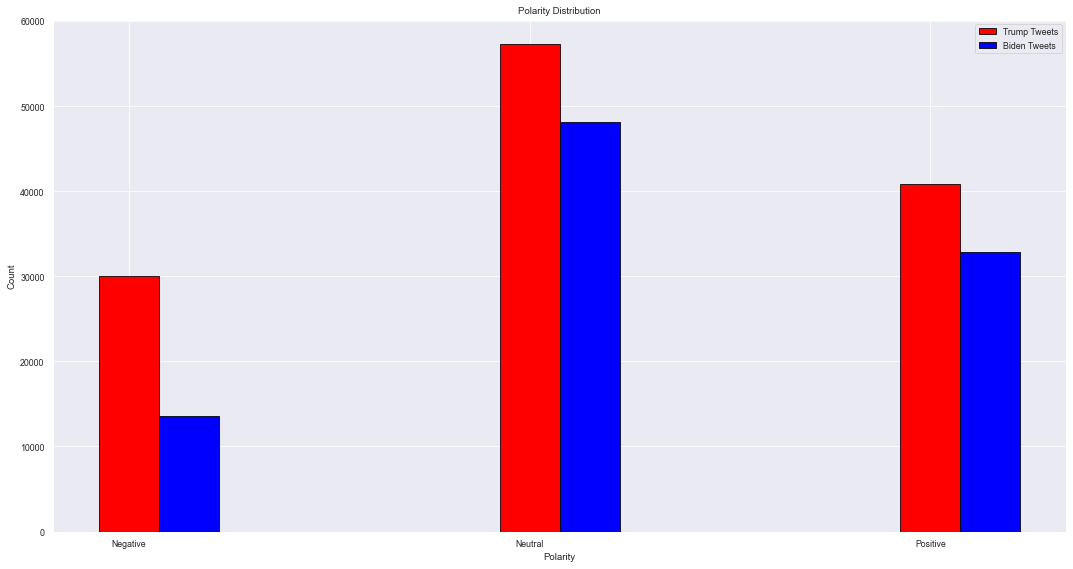

In [179]:
#Plot the above calculated data for Trump and Biden in a single bar chart 
width = 0.15

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(pol_count_trump)), height = [tup[1] for tup in pol_count_trump], 
        width = width,  color = "red", ec = "black", label = "Trump Tweets")

plt.bar(x = np.arange(len(pol_count_biden)) + width, height =  [tup[1] for tup in pol_count_biden], 
        width = width, color = "blue", ec = "black", label = "Biden Tweets")

plt.xticks(np.arange(len(pol_count_trump)), [tup[0] for tup in pol_count_trump])

plt.legend(loc = 'best')

plt.title('Polarity Distribution')

plt.ylabel('Count')

plt.xlabel('Polarity')

fig.tight_layout()

plt.show()

The above graph plots the number of tweets with a negative, neutral, or a positive polarity for Trump and Biden. Per the above graph, there are a considerable number of non-positive polarity tweets in each dataframe. Since we only want to analyze tweets from supporters, it is important to consider tweets with a positive polarity score only. 

In [180]:
#Filter the dataset to include only positive polarity tweets representing supporters 
trump = trump.loc[trump['Polarity'] > 0]

biden = biden.loc[biden['Polarity'] > 0]

In [181]:
#Creating a list of tweets exclusively for the WordCloud for both dataframes 
tweet_wc_trump = []

tweet_wc_biden = []

for tweet in trump['filtered_tweet']:
    
    tweet_wc_trump.append(tweet)
    
for tweet in biden['filtered_tweet']:
    
    tweet_wc_biden.append(tweet)

In [182]:
#Instantiate the WordClouds for both dataframes 
wc_trump = WordCloud(width = 750, height = 500, 
                  random_state = 1001, max_font_size = 100, 
                     max_words = 150, background_color = 'white').generate(str(tweet_wc_trump))

wc_biden = WordCloud(width = 750, height = 500, 
                  random_state = 1001, max_font_size = 100, 
                     max_words = 150, background_color = 'white').generate(str(tweet_wc_biden))

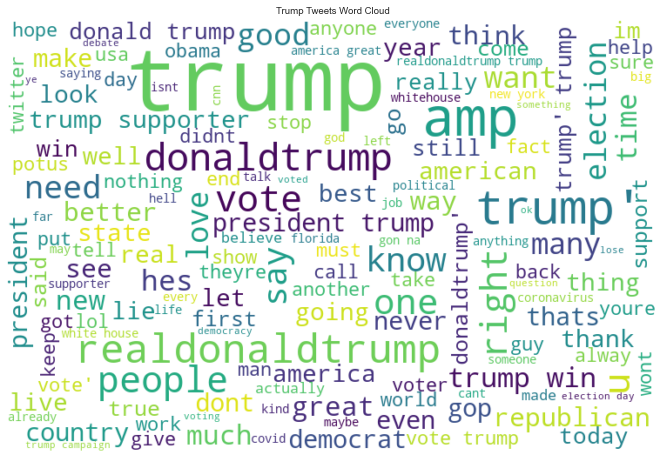

In [183]:
#Plot the Trump WordCloud 
plt.figure(figsize = (15,8))

plt.axis('off')

plt.imshow(wc_trump, interpolation = "bilinear")

plt.title('Trump Tweets Word Cloud')

plt.show()

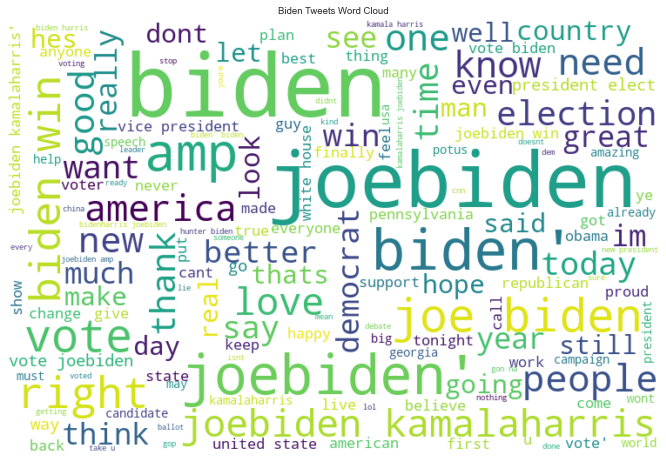

In [184]:
#Plot the Biden WordCloud 
plt.figure(figsize = (15,8))

plt.axis('off')

plt.imshow(wc_biden, interpolation = "bilinear")

plt.title('Biden Tweets Word Cloud')

plt.show()

I have chosen to include the above WordClouds to ensure that only positve sentiment tweets are being considered, to represent supporters. In both images, positive words such as 'good', 'great', 'support' are abundant. Moreover, each WordCloud has at least one mentioned instance of the corresponding party (i.e. Trump tweets WordCloud mentions Republican and Biden tweets WordCloud mentions Democratic). This ensures the tweets have been filtered correctly and we can proceed. 

Relative to my previous version, I have refined this graph by including only positive polarity tweets in the WordCloud, added a title, and removed the axes. I have also changed the background to white to make the image clearer.

### Summary Statistics

In [185]:
#Convert data type from object to int for both dataframes 
trump['likes'] = trump['likes'].astype(int)

biden['likes'] = biden['likes'].astype(int)

In [186]:
#Remove subjectivity summary statistics from both dataframes
sum_stats_trump = trump.describe().iloc[:, :-1]

sum_stats_biden = biden.describe().iloc[:, :-1]

In [187]:
#Rename the columns 
sum_stats_trump.columns = ['Trump Likes', 'Trump Retweets', 'Trump Polarity']

sum_stats_biden.columns = ['Biden Likes', 'Biden Retweets', 'Biden Polarity']

In [188]:
#Concatenate the above output into a single dataframe 
sum_stats = pd.concat([sum_stats_trump, sum_stats_biden], axis =1)

In [189]:
sum_stats

Trump Likes  Trump Retweets  Trump Polarity  Biden Likes  \
count   40829.0000      40829.0000      40829.0000   32837.0000   
mean        9.6852          2.3172          0.2974      21.4005   
std       209.9079         47.2891          0.2262     626.4747   
min         0.0000          0.0000          0.0000       0.0000   
25%         0.0000          0.0000          0.1250       0.0000   
50%         0.0000          0.0000          0.2444       1.0000   
75%         1.0000          0.0000          0.4000       2.0000   
max     23225.0000       5324.0000          1.0000   59403.0000   

       Biden Retweets  Biden Polarity  
count      32837.0000      32837.0000  
mean           4.1725          0.3405  
std           81.1492          0.2358  
min            0.0000          0.0000  
25%            0.0000          0.1500  
50%            0.0000          0.2857  
75%            0.0000          0.5000  
max         7489.0000          1.0000

The above table simply shows the summary statistics of the independent variables I intend to use to analyze whether tweets can be used as a leading indicator for a state's election results. 

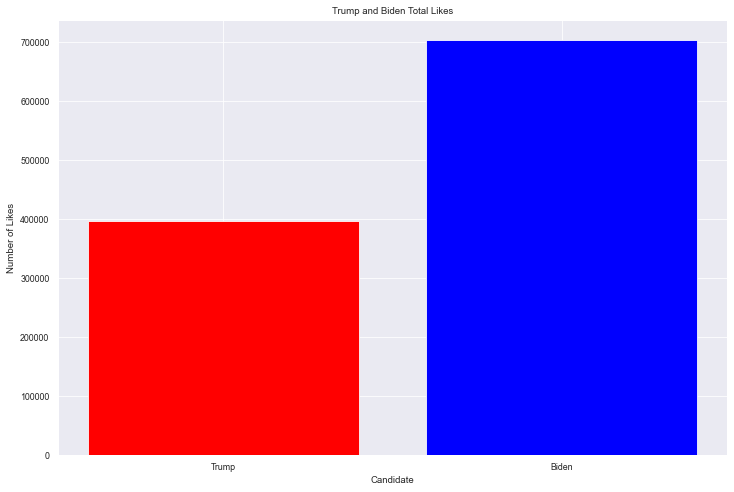

In [190]:
#Plot the total number of likes in each dataframe 
fig = plt.figure(figsize = (12,8))

plt.bar(x = ['Trump', 'Biden'], height = [trump['likes'].sum(), 
                                          biden['likes'].sum()], color = ['red', 'blue'])


plt.title('Trump and Biden Total Likes')

plt.ylabel('Number of Likes')

plt.xlabel('Candidate')

plt.show()

The above bar graph displays the total number of likes each tweet recieved in the respective dataframe, irrespective of the state. This paints a crude picture of whether the tweets can be used as a leading indicator. Clearly, Biden has far more likes than Trump and was the election winner. As such, the likes each tweet recieved can be loosely interpreted as a vote. 

In [191]:
#Filter both dataframes to exclude any outliers
cond1_trump = trump['likes'] > trump['likes'].quantile(0.01)
cond2_trump = trump['likes'] < trump['likes'].quantile(0.99)

cond1_biden = biden['likes'] > biden['likes'].quantile(0.01)
cond2_biden = biden['likes'] < biden['likes'].quantile(0.99)

likes_trump = list(trump[cond1_trump & cond2_trump]['likes'])

likes_biden = list(biden[cond1_biden & cond2_biden]['likes'])

In [192]:
#Create a dataframe holding the number of likes for Trump and Biden 
likes_trump_biden = pd.DataFrame({'Trump': pd.Series(likes_trump), 'Biden': pd.Series(likes_biden)})

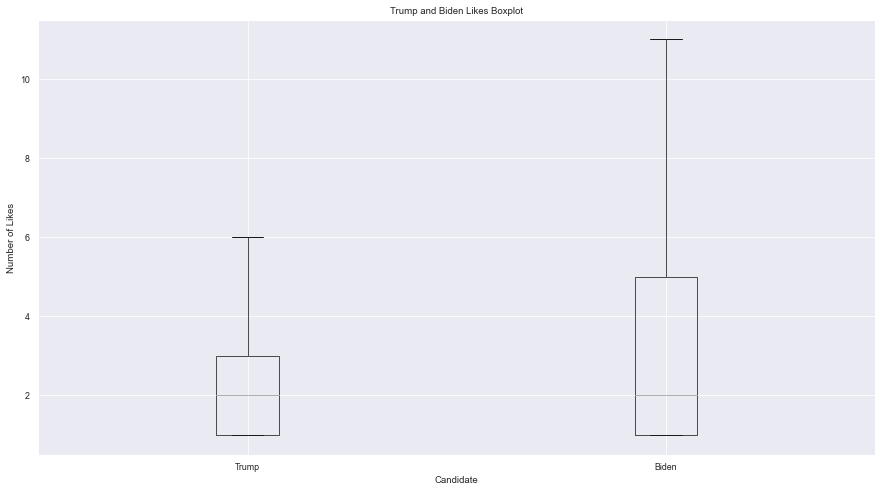

In [193]:
#Plot a boxplot excluding any outliers 
fig = plt.figure(figsize = (15,8))

likes_trump_biden.boxplot(showfliers = False)

plt.title('Trump and Biden Likes Boxplot')

plt.ylabel('Number of Likes')

plt.xlabel('Candidate')

plt.show()

The above graph plots the boxplot of the likes Trump and Biden tweets recieved. From the graph, although Trump and Biden tweets have the same median number of likes, Biden tweets have a greater number of positive outliers evident by a higher 75% quartile relative to Trump tweets. This reinforces what we observed in the 'Trump and Biden Total Likes' graph. A like can be interpreted as a single vote since the election winner, Biden, had a greater number of total likes and outliers relative to Trump. 

In [194]:
#Convert datatype from object to int
trump['retweet_count'] = trump['retweet_count'].astype(int)

biden['retweet_count'] = biden['retweet_count'].astype(int)

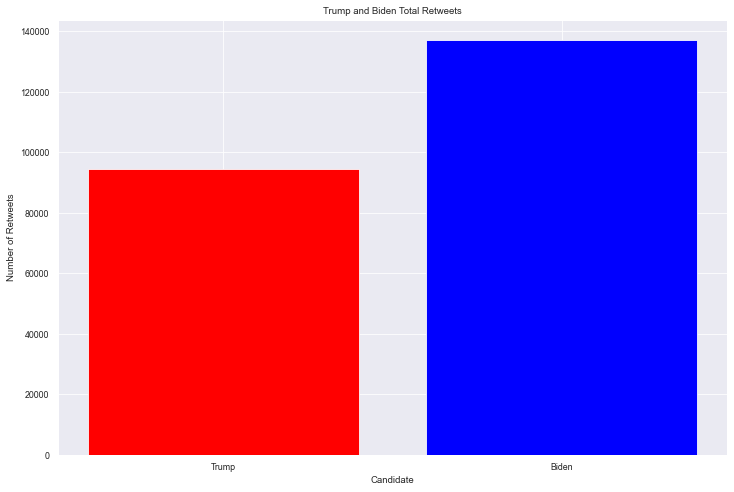

In [195]:
#Plot the total number of retweets in each dataframe 
fig = plt.figure(figsize = (12,8))

plt.bar(x = ['Trump', 'Biden'], height = [trump['retweet_count'].sum(), 
                                          biden['retweet_count'].sum()], color = ['red', 'blue'])


plt.title('Trump and Biden Total Retweets')

plt.ylabel('Number of Retweets')

plt.xlabel('Candidate')

plt.show()

The above graph paints a similar picture as 'Trump and Biden Total Likes' graph. The total number of retweets are clearly greater for Biden than Trump. As such, since Biden was the election winner, total retweets can be used as another acceptable independent variable to determine a state's election results. 

In [196]:
#Filter both dataframes to exclude any outliers
cond1_trump = trump['retweet_count'] > trump['retweet_count'].quantile(0.01)
cond2_trump = trump['retweet_count'] < trump['retweet_count'].quantile(0.99)

cond1_biden = biden['retweet_count'] > biden['retweet_count'].quantile(0.01)
cond2_biden = biden['retweet_count'] < biden['retweet_count'].quantile(0.99)

retweet_trump = list(trump[cond1_trump & cond2_trump]['retweet_count'])

retweet_biden = list(biden[cond1_biden & cond2_biden]['retweet_count'])

In [197]:
#Create a dataframe holding the number of likes for Trump and Biden 
retweets_trump_biden = pd.DataFrame({'Trump': pd.Series(retweet_trump), 
                                     'Biden': pd.Series(retweet_biden)})

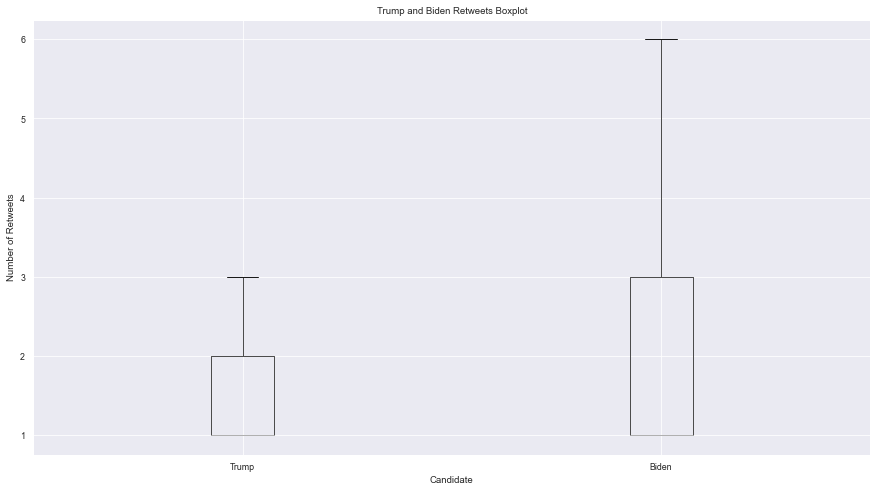

In [198]:
#Plot a boxplot excluding any outliers 
fig = plt.figure(figsize = (15,8))

retweets_trump_biden.boxplot(showfliers = False)

plt.title('Trump and Biden Retweets Boxplot')

plt.ylabel('Number of Retweets')

plt.xlabel('Candidate')

plt.show()

The above graph paints a similar picture as 'Trump and Biden Likes Boxplot' graph. Despite having the same median, Biden tweets have a much larger 75% quartile, implying a greater number of positive outliers. As such, the number of retweets have influenced the election results by a similar reasoning provided under 'Trump and Biden Likes Boxplot'.

In [199]:
#Group the total number of likes by state for each dataframe and concatenate into a single dataframe 
likes_trump = trump[['likes', 'state_code']].groupby('state_code').sum()['likes']

likes_biden = biden[['likes', 'state_code']].groupby('state_code').sum()['likes']

likes = pd.concat([likes_trump, likes_biden], axis = 1)

likes.columns = ['Trump Likes', 'Biden Likes']

In [200]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(likes.index):
    
    if state not in non_us:
        
        states.append(state)
        
likes = likes.loc[states, :]

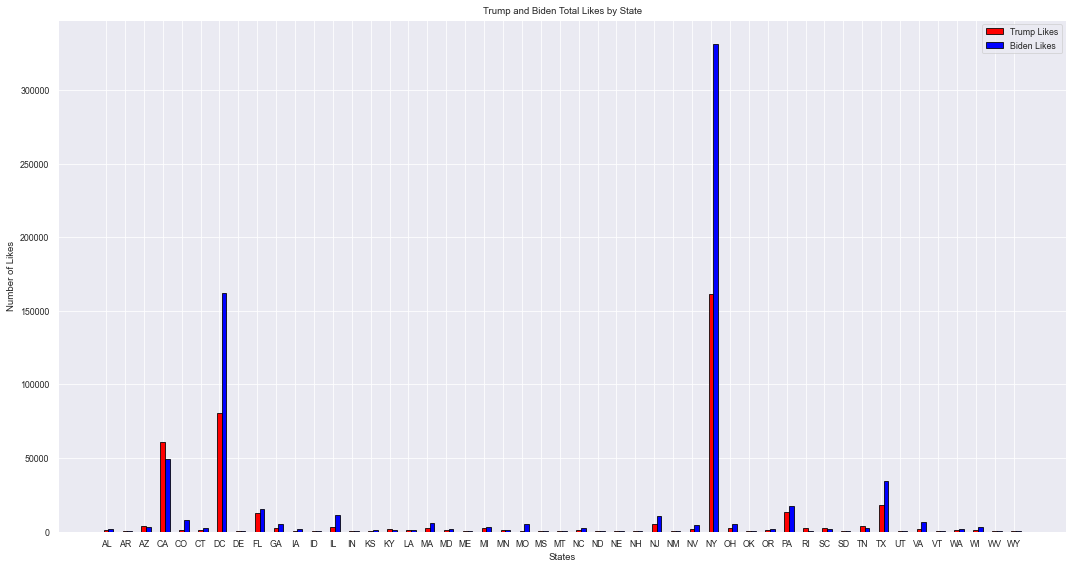

In [201]:
#Plotting the total number of likes for Trump and Biden tweets for each state
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(likes.index)), height = likes['Trump Likes'], width = width, 
        color = 'red', ec = 'black', label = 'Trump Likes')

plt.bar(x = np.arange(len(likes.index)) + width, height = likes['Biden Likes'], 
        width = width, color = 'blue', ec = 'black', label = 'Biden Likes')

plt.xticks(np.arange(len(likes.index)), list(likes.index))

plt.legend(loc = 'upper right')

plt.title('Trump and Biden Total Likes by State')

plt.xlabel('States')

plt.ylabel('Number of Likes')

plt.tight_layout()

plt.show()

The above graph plots the total number of likes Trump and Biden tweets recieved in each state. Attention is immediately drawn to New York which has a substantially greater number of likes for Biden relative to Trump. Here, the likes are an accurate representation of the state's election results since New York voted Democratic. However, if one looks at Florida, for instance, although Biden has greater number of likes, Florida voted Republican. This is evidence that likes cannot alone be used as a indicator for a state's election results. 

In [202]:
#Group the total number of retweets by state for each dataframe and concatenate into a single dataframe 
retweets_trump = trump[['retweet_count', 'state_code']].groupby('state_code').sum()['retweet_count']

retweets_biden = biden[['retweet_count', 'state_code']].groupby('state_code').sum()['retweet_count']

retweets = pd.concat([retweets_trump, retweets_biden], axis = 1)

retweets.columns = ['Trump Retweets', 'Biden Retweets']

In [203]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(likes.index):
    
    if state not in non_us:
        
        states.append(state)
        
retweets = retweets.loc[states, :]

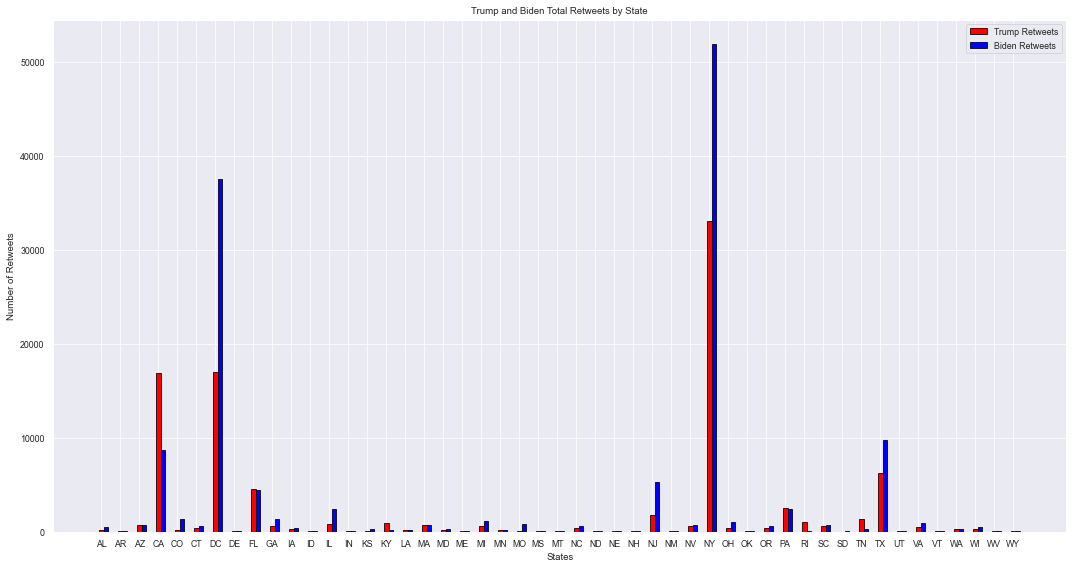

In [204]:
#Plotting the total retweets for Trump and Biden tweets for each state
width = 0.25

fig = plt.figure(figsize = (15,8))

plt.bar(x = np.arange(len(retweets.index)), height = retweets['Trump Retweets'], width = width, 
        color = 'red', ec = 'black', label = 'Trump Retweets')

plt.bar(x = np.arange(len(retweets.index)) + width, height = retweets['Biden Retweets'], 
        width = width, color = 'blue', ec = 'black', label = 'Biden Retweets')

plt.xticks(np.arange(len(retweets.index)), list(retweets.index))

plt.legend(loc = 'upper right')

plt.title('Trump and Biden Total Retweets by State')

plt.xlabel('States')

plt.ylabel('Number of Retweets')

plt.tight_layout()

plt.show()

The above graph plots the total retweets Trump and Biden tweets recieved. Continuing the above discussion, lets focus on Florida. In this graph, Trump tweets have a slightly larger number of retweets in Florida relative to Biden. Here, the retweets instead paint an acurrate picture of Florida's election results relative to total likes, in the previous graph. This reinforces my choices for independent variables since they both seem to have a tangible impact on the election results. 

I have refined this graph by choosing a clearer background and removing the grid. I have only considered positive polarity tweets so no bar goes below the zero-axis as in my previous graph. 

### Summary and Conclusion

Above, I explored the tweets, likes, and retweets in both dataframes to assess whether my chosen independent variables influence my dependent variable. I have visualized the data in multiple graphs. The above data exploration shows that likes and the total number of retweets, from positive polarity tweets, do seem to have an impact on the state's election results, although more visualization and analysis is required. However, insofar the choice of indepedent variables is suitable for the dependent variable. Note that the independent variables are able to better predict the election outcome for Democratic states relative to Republican tweets due to the data being more positive for Biden tweets relative to Trump tweets. 

# Project 2

### Introduction

Here, I will continue the above data visualization, in Project 1, but I will use the election results dataframe as well. This dataset is taken from the MIT ElectionLab website. This dataframe consists of the presedential election results from 1976 to 2020, although only the 2020 election results will be considered. In addition, the dataset lists the candidate and party of interest along with the votes each candidate recieved. Moreover, the dataset also includes the total votes each state recieved. By plotting the candidate votes and comparing it with the above data, in Project 1, on a map, I hope to obtain a clearer visualization of my data and better assess whether more likes and retweets contribute to a candidate's victory in a given state. As before, only positive polarity tweets will be considered to represent supporters. 

## Part Two

### Message

A greater number of likes for a candidate corrrespond to greater support for that respective candidate. As such, states where Biden tweets recieved greater number of likes are where is he most likely to win. The same holds true for Trump tweets. A similar reasoning holds for retweets.

In [205]:
#Count the number of tweets in each state and merge into a single dataframe 
count_trump = pd.DataFrame(trump.groupby('state_code').count()['tweet'])

count_trump.columns = ['Trump']

count_biden = pd.DataFrame(biden.groupby('state_code').count()['tweet'])

count_biden.columns = ['Biden']

count = pd.merge(count_trump, count_biden, on = 'state_code')

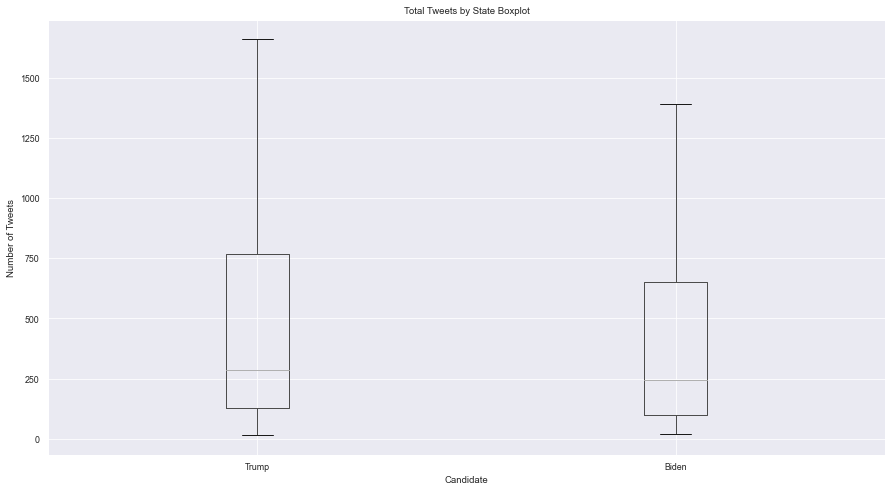

In [206]:
#Plot the above data into a boxplot 
fig = plt.figure(figsize = (15,8))

count.boxplot(showfliers = False)

plt.title('Total Tweets by State Boxplot')

plt.ylabel('Number of Tweets')

plt.xlabel('Candidate')

#plt.grid()

plt.show()

The graph plots the number of tweets grouped by state for each candidate. The aim of this graph is to find which candidate is referred to the most and whether this necessarily translates into greater total likes and retweets. However, from Project 1 initial bar graphs we can reject this assumption. Thus, it is clear that although Biden is underrepresented in the dataframe, relative to Trump, Biden's data is much more positive than Trump. This hints towards an aggregate victory for Biden. 

I have refined this graph, relative to my paper version, by including appropriate tick labels for the y-axis and a grid to better compare the differences between both boxplots. Since this graph is relatively simple, additional details are not required. 

Graph Draft 1.jpg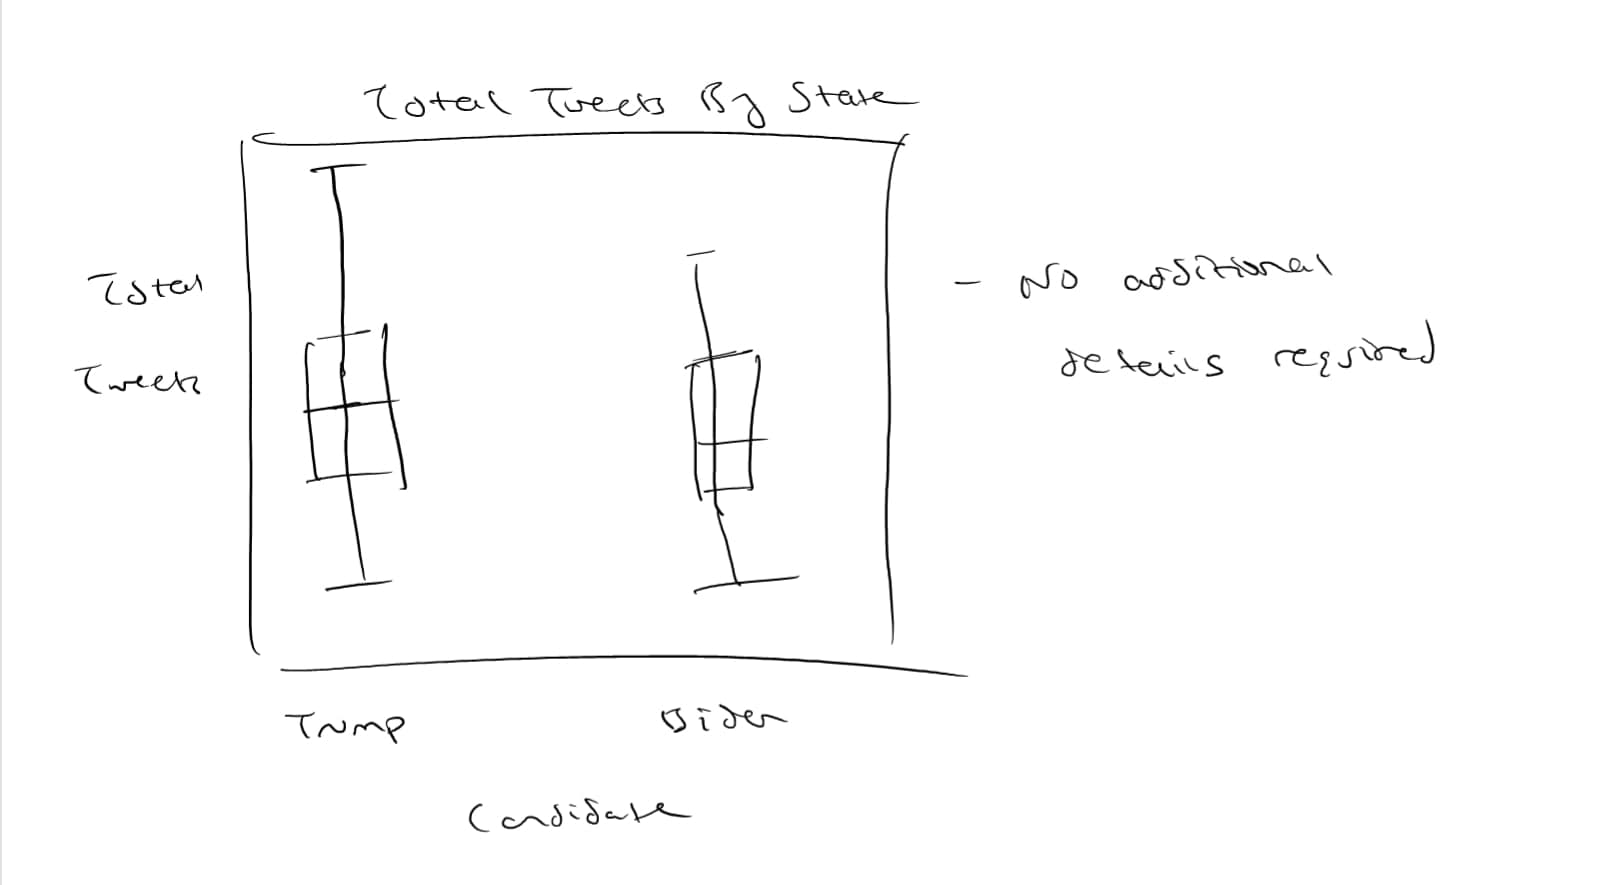

In [207]:
#Extract only date from created_at column
created_at_trump = []

created_at_biden = []

for date in trump['created_at']:
    
    date_ = pd.to_datetime(date)
    
    date_ = date_.date()
    
    created_at_trump.append(date_)
    
for date in biden['created_at']:
    
    date_ = pd.to_datetime(date)
    
    date_ = date_.date()
    
    created_at_biden.append(date_)

In [208]:
#Calculate the cumulative likes each candidate recieved daily
trump['created_at'] = created_at_trump

cum_likes_trump = trump.groupby('created_at').sum()['likes'].cumsum()

biden['created_at'] = created_at_biden

cum_likes_biden = biden.groupby('created_at').sum()['likes'].cumsum()

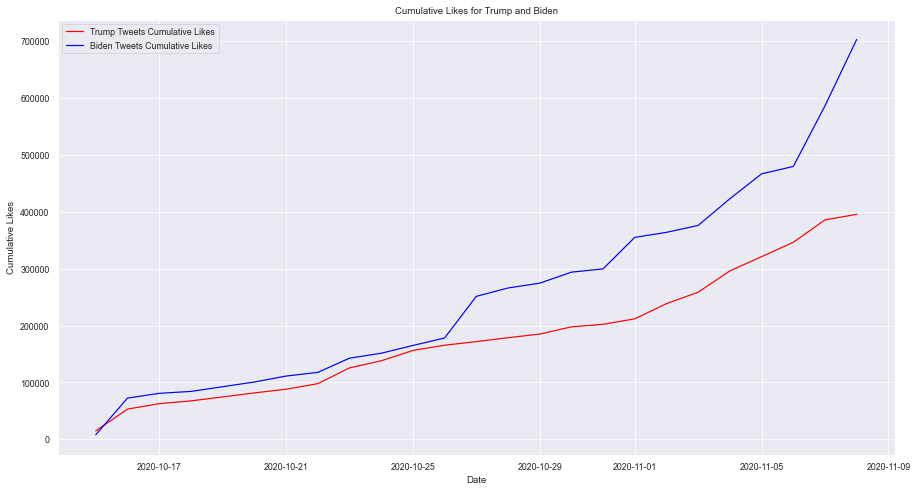

In [209]:
#Plot the cumulative likes 
fig = plt.figure(figsize = (15,8))

plt.plot(cum_likes_trump, color = 'red', label = 'Trump Tweets Cumulative Likes')

plt.plot(cum_likes_biden, color = 'blue', label = 'Biden Tweets Cumulative Likes')

plt.title('Cumulative Likes for Trump and Biden')

plt.ylabel('Cumulative Likes')

plt.xlabel('Date')

plt.legend(loc = 'best')

plt.show()

The graph plots the cumulative likes Trump and Biden tweets recieved over time. As can be seen, Biden tweets, in the final few days, realize a steep upwards trajectory whereas Trump tweets stay relatively stable. The steepness of the final part of Biden's line graph represents support growing relatively quicker for Biden. As such, this hints towards a victory for Biden.

I have refined this graph, relative to my paper version, by adding a legend in an appropriate location and including tick labels for the date and cumulative likes. Due to the simplicity of the graph, no additional components need to be added. 

Graph Draft 2.jpg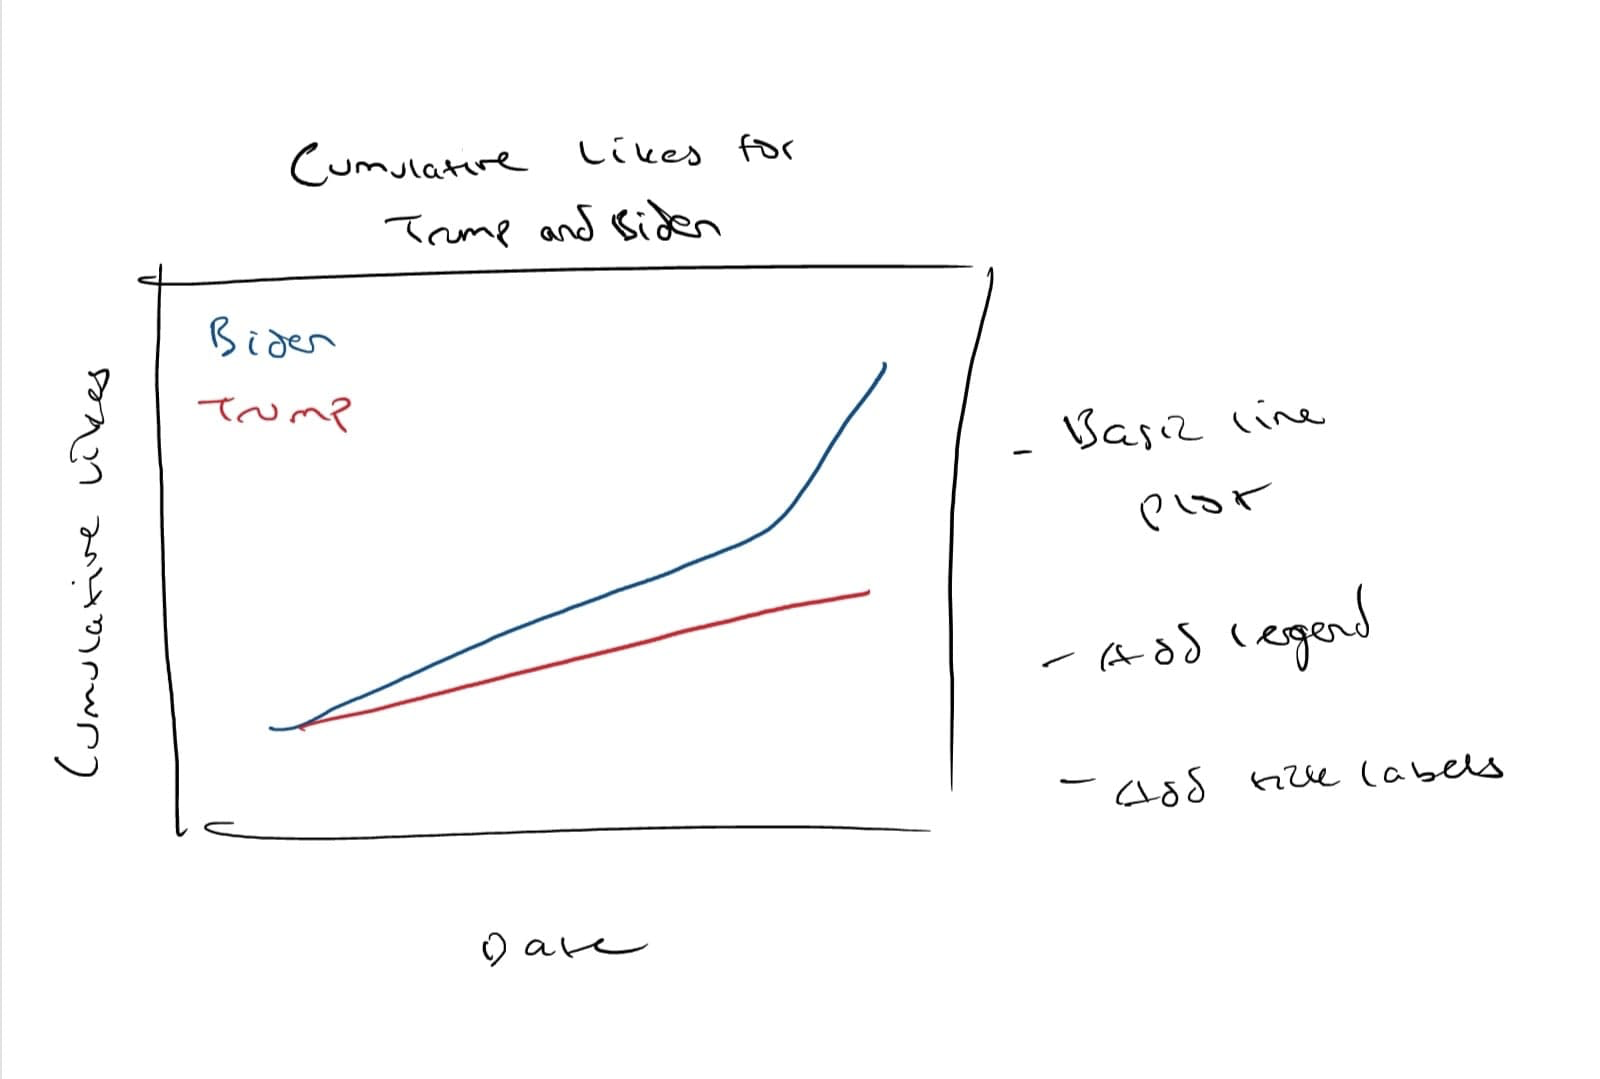

### Part Three

In [210]:
import geopandas as gpd
from shapely.geometry import Point

In [211]:
#Count the number of likes in each state
likes_trump = trump.groupby('state_code').sum()['likes']

likes_biden = biden.groupby('state_code').sum()['likes']

In [212]:
#Concatenate the above output into a single dataframe
likes = pd.DataFrame({'Trump': pd.Series(likes_trump), 'Biden': pd.Series(likes_biden)})

In [213]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(count_biden.index):
    
    if state not in non_us:
        
        states.append(state)
        
likes = likes.loc[states, :]

In [214]:
#Reset the index and rename the column
likes.reset_index(inplace = True)

likes.rename(columns = {'index':'STUSPS'}, inplace = True)

In [215]:
#Read in the shape file
states_ = gpd.read_file('cb_2018_us_state_500k.shp')

states_ = states_.to_crs('EPSG:3395')

In [216]:
#Merge the count_biden dataframe with the states shapefile
likes_map = pd.merge(likes, states_, on = 'STUSPS')

likes_map = gpd.GeoDataFrame(likes_map)

In [217]:
#Helps to fit the color bar to the height of the map
from mpl_toolkits.axes_grid1 import make_axes_locatable

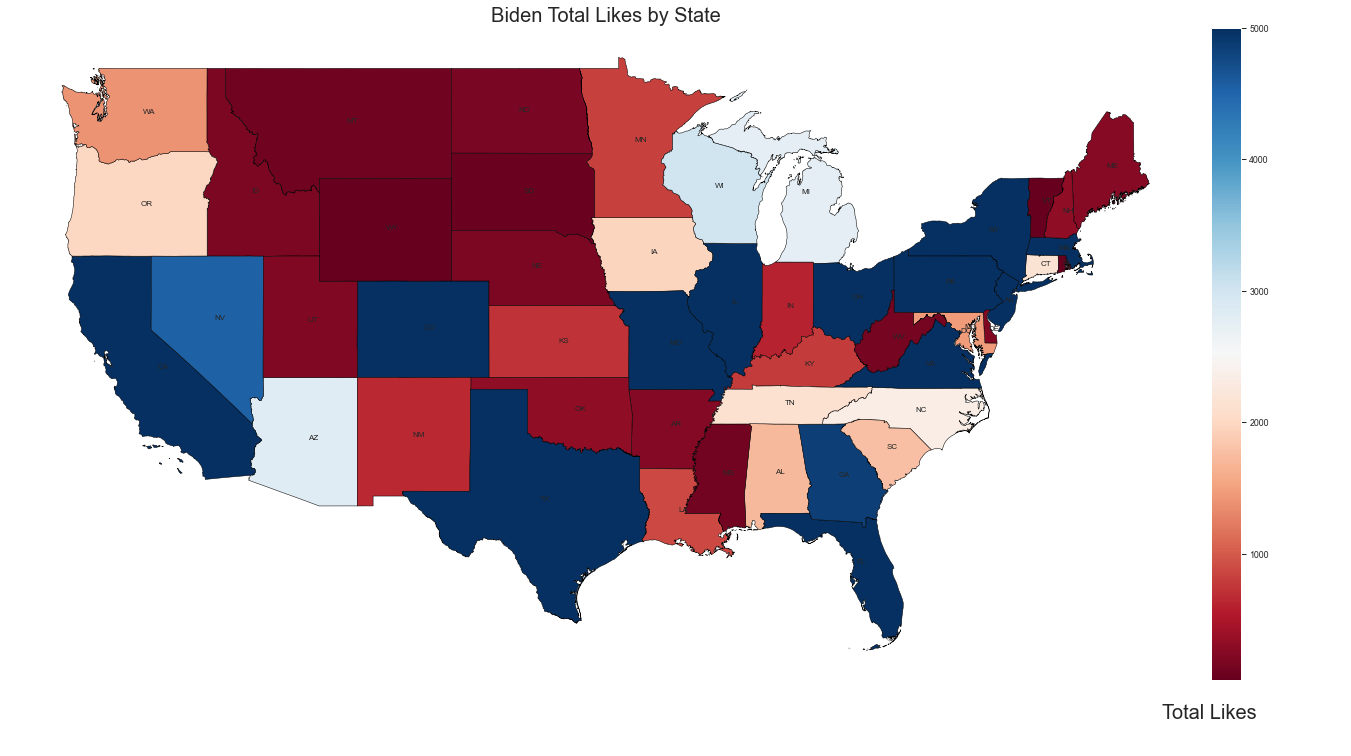

In [218]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

#Chosen 5000 to cap the color bar to limit extremely high level of likes from distorting the map
likes_map.plot(column = 'Biden', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu', legend = True, 
               cax = cax, vmax = 5000)

for state, geometry in zip(likes_map['STUSPS'], likes_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Biden Total Likes by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Total Likes', xy=(0.86, 0.05),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

The above graph plots the total likes Biden tweets recieved by state. Only positive polarity tweets are considered. States with lower total likes are red whereas states with higher total likes are blue. The above map looks considerably similar to election results, where the middle states voted Republican and states such as California and New York voted Democratic. The pale red states, such as Orlando and Washington also voted Democratic. There are certain states such as Texas and Florida which are outliers since Trump won in these states but are colored blue. A similar analysis can be conducted for Trump but for brevity has been omitted.

Notice this map shows a similar relationship as to what we observed in Project 1. The total likes continue to have a tangible impact on the state's election results, especially those which voted Democratic. Notice that the color map has been capped at 5000 since otherwise certain states, such as New York, where tweets recieved numerous likes, can easily distort the visualization, for instance, by coloring states such as Ilinois and Ohio in red. 

*I have dropped all non-continental states to obtain a clearer visualization of my data and focus on the core states rather than outlying states which add little significance to my research question. 

In [219]:
#Load in election results dataset
results = pd.read_csv('1976-2020-president.csv').query(
    'year == "2020"')[['state_po', 'party_simplified','candidatevotes']]

In [220]:
#Filter the dataset to include only Republican and Democratic Votes
results_trump = results.query('party_simplified == "REPUBLICAN"') 

results_biden = results.query('party_simplified == "DEMOCRAT"')

results_trump.rename(columns = {'candidatevotes':'Trump Votes'}, inplace = True)

results_trump.drop(columns = 'party_simplified', inplace = True)

results_biden.rename(columns = {'candidatevotes':'Biden Votes'}, inplace = True)

results_biden.drop(columns = 'party_simplified', inplace = True)

In [221]:
#Merge the above output into a single dataframe and set the states to be the index
results = pd.merge(results_trump, results_biden, on = 'state_po')

results.set_index('state_po', inplace = True)

In [222]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(results.index):
    
    if state not in non_us:
        
        states.append(state)
        
results = results.loc[states, :]

In [223]:
#Reset and rename column
results.reset_index(inplace = True)

results.rename(columns = {'state_po':'STUSPS'}, inplace = True)

In [224]:
#Calculate the percentage of total votes each candidate recieved 
results['Trump Percentage'] = results['Trump Votes']/(results['Trump Votes'] + results['Biden Votes'])

results['Biden Percentage'] = results['Biden Votes']/(results['Trump Votes'] + results['Biden Votes'])

In [225]:
#Merge the above output with the states shape file 
results_map = pd.merge(results, states_, on = 'STUSPS')

results_map = gpd.GeoDataFrame(results_map)

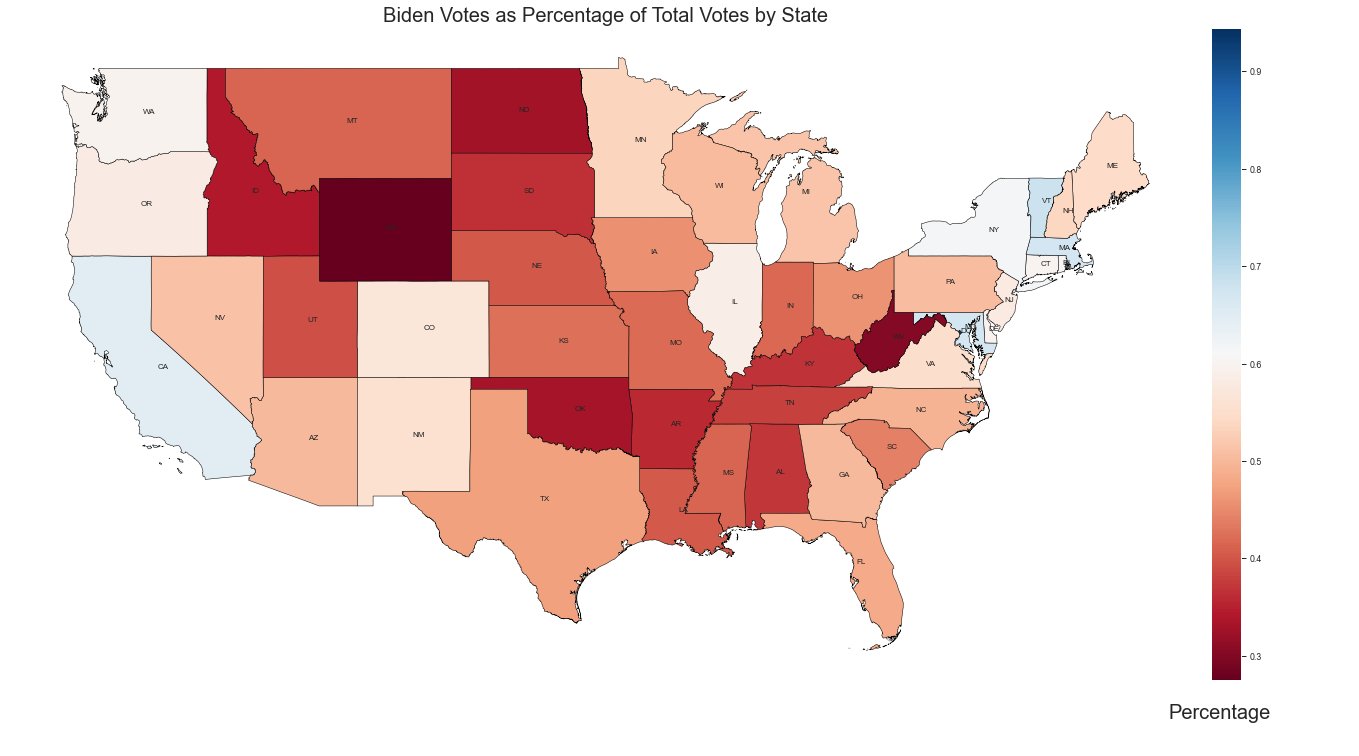

In [226]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

results_map.plot(column = 'Biden Percentage', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu', legend = True, cax = cax)

for state, geometry in zip(results_map['STUSPS'], results_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Biden Votes as Percentage of Total Votes by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Percentage', xy=(0.86, 0.05),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

The above map plots the votes Biden recieved as a percentage of total votes in each state. This map is very similar to 'Biden Total Likes by State' graph. The middle states are red, implying a low voting percentage for Biden and a higher voting percentage for Trump. The lightly colored states, which represent a victory for Biden, coincide with what was observed in the previous graph. For instance, California's color in both graphs represent a victory for Biden. Pale states such as Washington and Orlando also coincide with the results observed in the previous graph. This shows that the total likes serve as an accurate indicator for predicting victory for Biden. The graph for Trump is not shown since it is the same as Biden's due to the election being a zero-sum game (i.e. wherever Biden recieved lower percentage of votes, Trump recieved a greater percentage and by reversing the color scheme the same graph is obtained). 

### Summary and Conclusion

After merging my initial dataframes with the election results, a clear correlation can be seen between my independent variables and my outcome. The initial two graphs, in Part 2, show overwhelming support for Biden, in terms of likes, despite Trump having a greater number of tweets on average. The map visualizations, in Part 3, are also able to show this correlation. States where Biden won, represented by the pale colored states in the second map, coincide with the states where Biden recieved more likes, represented by the blue colored states in the initial map. As such, the total number of likes each candidate tweets recieved can be used as a leading indicator for predicting a states's elections results. 

## Part Two

### Introduction and Message

The dataset I intend to webscrape is the proportion of white population in each state. I think this dataset will enhance my current data by providing a strong indpendent variable to measure my response variable. With support for Trump becoming more assosciated with white supremacy in recent media, racial diversity can add further strength to my chosen independent variables for predicting a state's election results. 

My message is states with lower proportions of white population are more likely to support Biden. Racial diversity is likely to be persistent and makes it easier to welcome new races presently and in the future. Hence, states with lower proportion of white population, implying racial diversity, are likely to support the less aggressive and more well rounded policies under Biden that one would perhaps not enjoy under Trump.

I have chosen to refine my message to reflect the additional information and value added to my research question by this dataset. Not only will adding this information provide me with a strong independent variable but perhaps provide causal interpretation behind each candidate tweets likes. 

I intend to webscrape from this site: https://en.wikipedia.org/wiki/List_of_U.S._states_by_non-Hispanic_white_population. 

Since this measure is annually changing, based on survey frequency, for accurate analysis, the data must be webscraped at least once annually. However, this also depends on how often the site, Wikipedia, updates its data. Since this data is latest as of 2012, there is a clear drawback to using it. However, sites containing this information often enclose the data in an interactive table, making it difficult to webscrape and as such I must resort to Wikipedia due to its ease of accesibility when webscraping. By using pd.merge I intend to merge this dataframe with my existing shapefiles and plot my findings on the US map for the clearest interpretation. After visualizaing my data in this manner I intend to compare it with the Biden tweets likes map and election results map to find any similarities between the results and assess the strength of my message, written above. 



### Webscraping and Visualization

In [227]:
#Import the required packages
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [228]:
#Instantiate the website and convert it into a BeautifulSoup object
web_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_by_non-Hispanic_white_population'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)

In [229]:
#Extract the html code for the required table
data_table = soup_object.find_all('table', 'wikitable')[0]

In [230]:
#Find all instants of rows within the table 
all_values = data_table.find_all('tr')

In [231]:
#Extract the state and proportion of white population from the table and enclose into a dataframe
states = []
race_prop = []

for row in all_values[1:]:
    
    values = row.find_all('td') 
    
    states.append((re.sub(r'\n', '', values[0].text)).strip())
    race_prop.append(re.sub(r'%\n','',values[-3].text))
    
race = pd.DataFrame({'White Prop':race_prop}, index = states).iloc[:-6,:]

In [232]:
#Drop unrequired US states to focus on only core US states
non_us = ['Alaska', 'Hawaii']

states = []

for state in list(race.index):
    
    if state not in non_us:
        
        states.append(state)
        
race = race.loc[states, :]

In [233]:
#Reset the index and rename the columns
race.reset_index(inplace = True)

race.columns = ['NAME', 'White Prop']

In [234]:
#Merge the webscraped dataframe with the US state shapefiles 
race_map = pd.merge(race, states_, on = 'NAME')

race_map = gpd.GeoDataFrame(race_map)

In [235]:
#Convert from object to a numerical data type
race_map['White Prop'] = pd.to_numeric(race_map['White Prop'], errors = 'coerce')

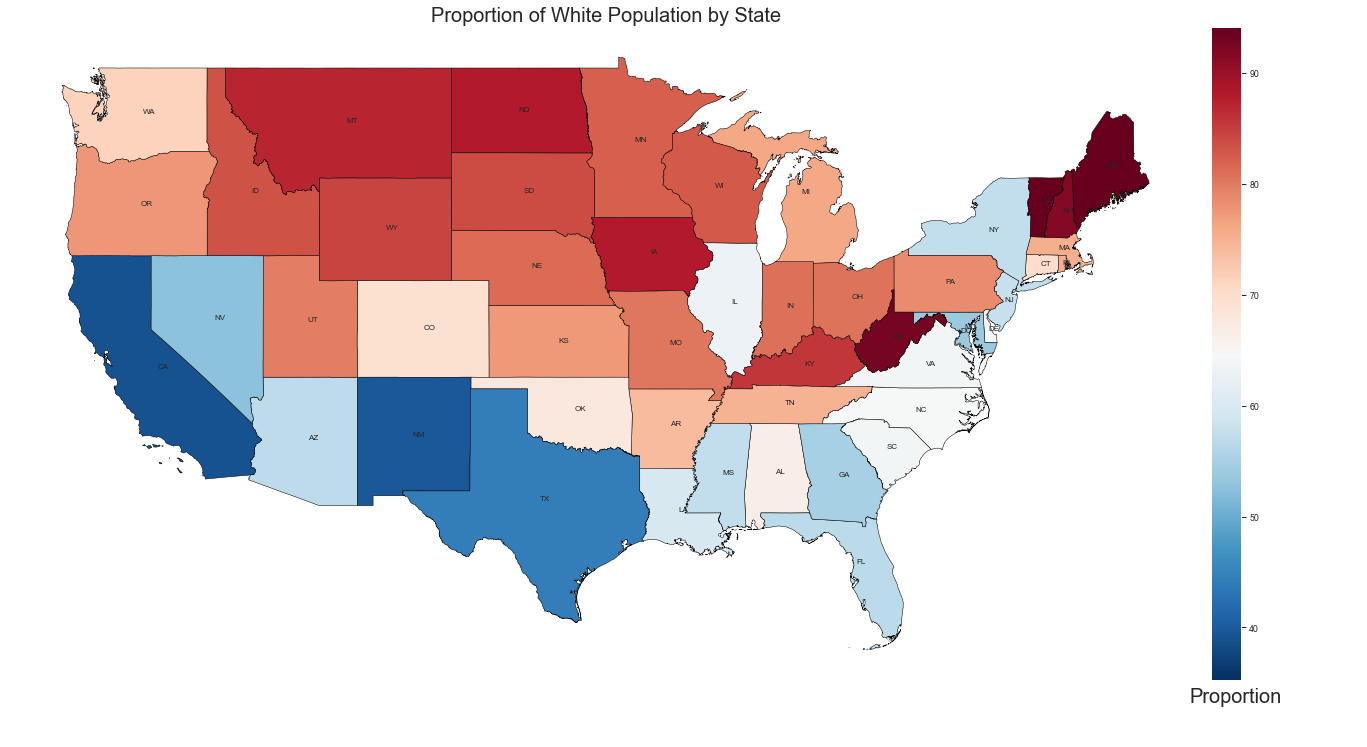

In [236]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

race_map.plot(column = 'White Prop', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu_r', legend = True, cax = cax)

for state, geometry in zip(race_map['STUSPS'], race_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Proportion of White Population by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Proportion', xy=(0.87, 0.06),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

This map shows the proportion of white population for each state. The middle and top states, corresponding to greater concentration of white population, were victories for Trump. States such as California and New York, which voted for Biden, have lower proportion of white population. There are a few outliers like Texas and Florida which voted for Trump but have low proportions of white population. Other outliers include Maine and Vermont which had voted for Biden but have high proportions of white population. Moreover, this map is quite similar to the likes Biden received and its map visualization. States with lower proportions of white population are states where Biden tweets recieved more likes and vice versa. 

From above, it can be inferred this variable is marginally acceptable for communicating my message and predicting a state's elections results. The similarity between this map and Biden tweets likes map is evidence of Biden being supported by a more diverse demographic, when support is being measured by the likes Biden tweets recieved. Moreover, most states colored red are states where Trump won and most non-red/pale red states are states where Biden won. But, the direction and number of outliers do negate the variable's predictive power and show how we cannot rely soley on it to predict the state's election results. As such, this variable seems to succumb to at least similar downfalls as tweet likes when predicting election results. 

*The same analysis can be done for Trump but is omitted for consistency and brevity. Choosing to focus on Biden is an arbitrary choice and increases the cleanliness of the project and avoids repetition. 

In [237]:
likes_race = pd.merge(likes, race_map.loc[:, ['STUSPS', 'White Prop']], on = 'STUSPS')

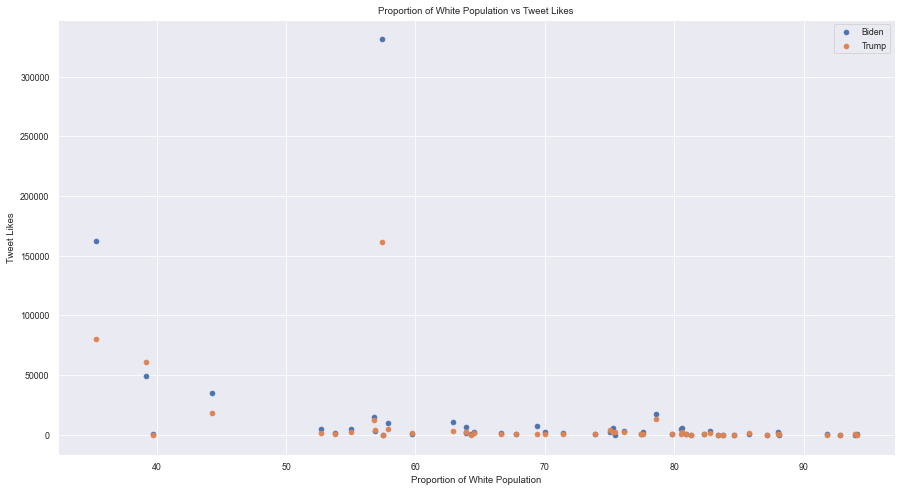

In [238]:
fig = plt.figure(figsize = (15,8))

plt.scatter('White Prop', 'Biden', data = likes_race, label = 'Biden')

plt.scatter('White Prop', 'Trump', data = likes_race, label = 'Trump')

plt.title('Proportion of White Population vs Tweet Likes')

plt.xlabel('Proportion of White Population')

plt.ylabel('Tweet Likes')

plt.legend(loc = 'best')

plt.show()

The above graph plots each state's proportion of white population against Biden and Trump tweet likes by state. After inferring the similarity between the map visualizations of the proportion of white population and Biden tweet likes, I found it important to include this scatterplot to scrutinize the relationship further. Notice that in states with lower proportions of white population, Biden tweets recieved more likes than Trump. However, once we approach high values along the x-axis, this difference starts to shrink, with a few outliers. Thus, although a state's proportion of white population does offer insight into the state's support for Biden and Trump, it is marginal. As such, this variable does not possess the kind of predictive power I had initially assumed but is still acceptable at communicating my message. 

## Part Three

##### *Here I repeat Project 2 - Part Three since I have already completed Project 3 - Part Three under Project 2 - Part Three. For the sake of completion I have included it below again. 

In [239]:
#Load in election results dataset
results = pd.read_csv('1976-2020-president.csv').query(
    'year == "2020"')[['state_po', 'party_simplified','candidatevotes']]

In [240]:
#Filter the dataset to include only Republican and Democratic Votes
results_trump = results.query('party_simplified == "REPUBLICAN"') 

results_biden = results.query('party_simplified == "DEMOCRAT"')

results_trump.rename(columns = {'candidatevotes':'Trump Votes'}, inplace = True)

results_trump.drop(columns = 'party_simplified', inplace = True)

results_biden.rename(columns = {'candidatevotes':'Biden Votes'}, inplace = True)

results_biden.drop(columns = 'party_simplified', inplace = True)

In [241]:
#Merge the above output into a single dataframe and set the states to be the index
results = pd.merge(results_trump, results_biden, on = 'state_po')

results.set_index('state_po', inplace = True)

In [242]:
#Eliminate all non-continguous US states
non_us = ['AK', 'HI', 'PR', 'MP', 'GU']

states = []

for state in list(results.index):
    
    if state not in non_us:
        
        states.append(state)
        
results = results.loc[states, :]

In [243]:
#Reset and rename column
results.reset_index(inplace = True)

results.rename(columns = {'state_po':'STUSPS'}, inplace = True)

In [244]:
#Calculate the percentage of total votes each candidate recieved 
results['Trump Percentage'] = results['Trump Votes']/(results['Trump Votes'] + results['Biden Votes'])

results['Biden Percentage'] = results['Biden Votes']/(results['Trump Votes'] + results['Biden Votes'])

In [245]:
#Merge the above output with the states shape file 
results_map = pd.merge(results, states_, on = 'STUSPS')

results_map = gpd.GeoDataFrame(results_map)

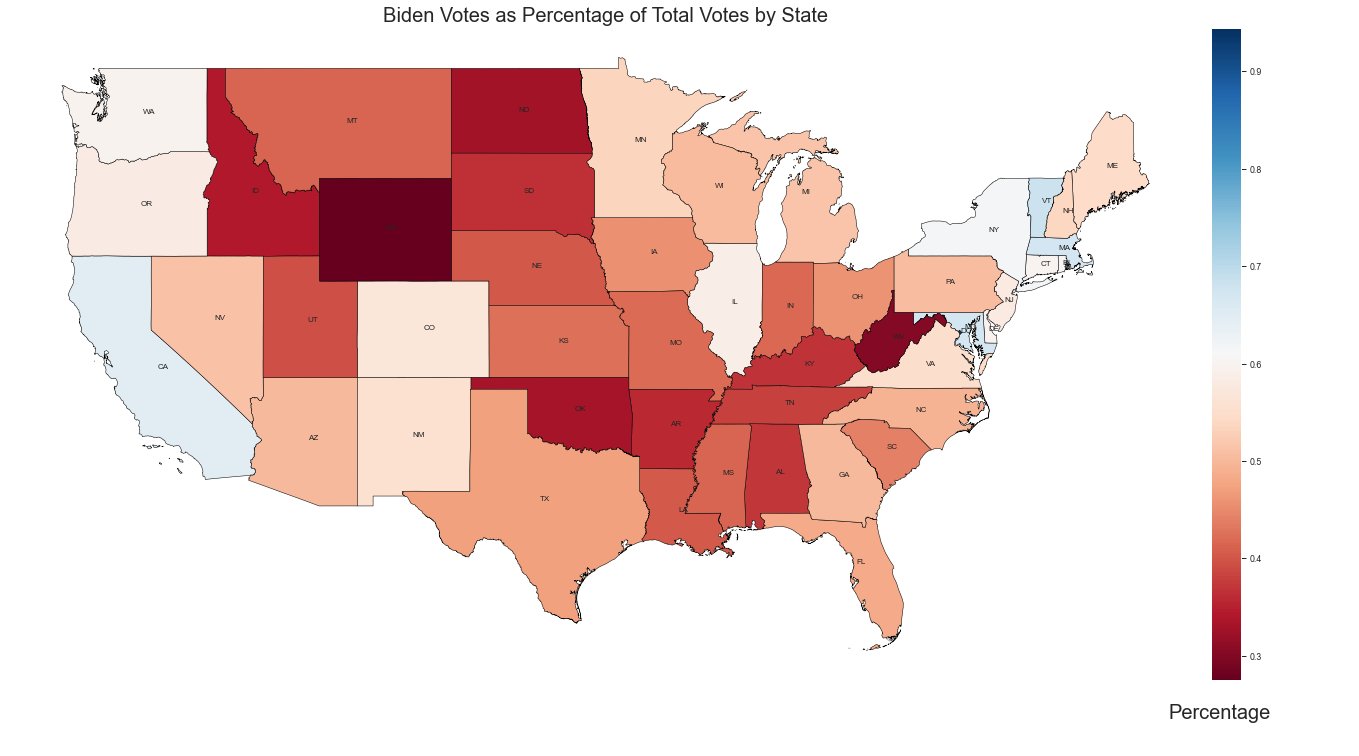

In [246]:
#Plot the map
fig, gax = plt.subplots(figsize = (25, 12))

divider = make_axes_locatable(gax)

cax = divider.append_axes('right', size = '2.5%', pad = 0.1)

results_map.plot(column = 'Biden Percentage', ax = gax, edgecolor = 'black', 
             linewidth = 0.5, cmap='RdBu', legend = True, cax = cax)

for state, geometry in zip(results_map['STUSPS'], results_map['geometry']):
    
    gax.annotate(state, 
                 xy = (geometry.centroid.x, geometry.centroid.y), 
                 fontsize = 8)
    
gax.set_title('Biden Votes as Percentage of Total Votes by State', fontsize = 20)
    
gax.axis('off')

gax.annotate('Percentage', xy=(0.86, 0.05),  
             xycoords='figure fraction', fontsize = 20)

plt.show()

The above map plots the votes Biden recieved as a percentage of total votes in each state. This map is very similar to 'Biden Total Likes by State' graph. The middle states are red, implying a low voting percentage for Biden and a higher voting percentage for Trump. The lightly colored states, which represent a victory for Biden, coincide with what was observed in the previous graph. For instance, California's color in both graphs represent a victory for Biden. Pale states such as Washington and Orlando also coincide with the results observed in the previous graph. This shows that the total likes serve as an accurate indicator for predicting victory for Biden. The graph for Trump is not shown since it is the same as Biden's due to the election being a zero-sum game (i.e. wherever Biden recieved lower percentage of votes, Trump recieved a greater percentage and by reversing the color scheme the same graph is obtained). 

### Summary and Conclusion 

Above, I webscraped to obtain the proportion of white population per state. I then merged it with my shapefile dataset to plot it on the US map and then plotted a scatterplot of a state's proportion of white population against each candidate tweets likes by state. From the map, it can be concluded that the proportion of white population serves as an appropriate indicator, albeit marginally, in predicting a state's election results. Moreover, from the map and scatterplot, it can be concluded that a state's proportion of white population does provide insight into each candidate's support. States with lower proportions of white population have greater tweet likes for Biden relative to Trump. This difference gets smaller, almost converging to 0, as the proportion of white population increases. 

In conclusion, this variable upholds my message where states with racial diversity are more likely to support Biden. This also provides further insight into using tweet likes as a measure of support. The above data visualizations provide some causual interpretation behind the tweet likes. States with greater racial diversity are states where Biden recieved more likes relative to Trump. As such, by providing a causual interpretation to the relationship between tweet likes and a state's election results, this variable has increased the strength of Project 2's conclusion that tweet likes can be used as a leading indicator for a state's election results. 